In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mn
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.stats import shapiro
import pylab
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [2]:
data = pd.read_excel('Toyota.xlsx')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86.0,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86.0,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86.0,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86.0,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
list(data.columns.values)

['Id',
 'Model',
 'Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'Fuel_Type',
 'HP',
 'Met_Color',
 'Color',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Tow_Bar']

In [4]:
raw_data =data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]
raw_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90.0,2000,3,5,210,1165,13500
1,23,72937,90.0,2000,3,5,210,1165,13750
2,24,41711,90.0,2000,3,5,210,1165,13950
3,26,48000,90.0,2000,3,5,210,1165,14950
4,30,38500,90.0,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86.0,1300,3,5,69,1025,7500
1432,72,19000,86.0,1300,3,5,69,1015,10845
1433,71,17016,86.0,1300,3,5,69,1015,8500
1434,70,16916,86.0,1300,3,5,69,1015,7250


In [5]:
raw_data =raw_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'}, axis=1)
raw_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,23,46986,90.0,2000,3,5,210,1165,13500
1,23,72937,90.0,2000,3,5,210,1165,13750
2,24,41711,90.0,2000,3,5,210,1165,13950
3,26,48000,90.0,2000,3,5,210,1165,14950
4,30,38500,90.0,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86.0,1300,3,5,69,1025,7500
1432,72,19000,86.0,1300,3,5,69,1015,10845
1433,71,17016,86.0,1300,3,5,69,1015,8500
1434,70,16916,86.0,1300,3,5,69,1015,7250


In [6]:
raw_data.describe()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
count,1436.000000,1436.000000,1434.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.513250,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.987975,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1436 non-null   int64  
 1   KM      1436 non-null   int64  
 2   HP      1434 non-null   float64
 3   CC      1436 non-null   int64  
 4   Doors   1436 non-null   int64  
 5   Gears   1436 non-null   int64  
 6   QT      1436 non-null   int64  
 7   Weight  1436 non-null   int64  
 8   Price   1436 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 101.1 KB


In [8]:
raw_data.isnull().sum()

Age       0
KM        0
HP        2
CC        0
Doors     0
Gears     0
QT        0
Weight    0
Price     0
dtype: int64

In [9]:
raw_data.isna().sum()

Age       0
KM        0
HP        2
CC        0
Doors     0
Gears     0
QT        0
Weight    0
Price     0
dtype: int64

In [10]:
raw_data[raw_data.duplicated()]


,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
113,8,13253,116.0,2000,5,5,234,1320,24950


In [11]:
raw_data=raw_data.drop(raw_data[raw_data.duplicated()].index)

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1435 non-null   int64  
 1   KM      1435 non-null   int64  
 2   HP      1433 non-null   float64
 3   CC      1435 non-null   int64  
 4   Doors   1435 non-null   int64  
 5   Gears   1435 non-null   int64  
 6   QT      1435 non-null   int64  
 7   Weight  1435 non-null   int64  
 8   Price   1435 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 112.1 KB


###### We had 1 duplicated value and we have treated this problem by deleteing the duplicate row

###### We have 2 Null values in HP column, so let's treat this values first

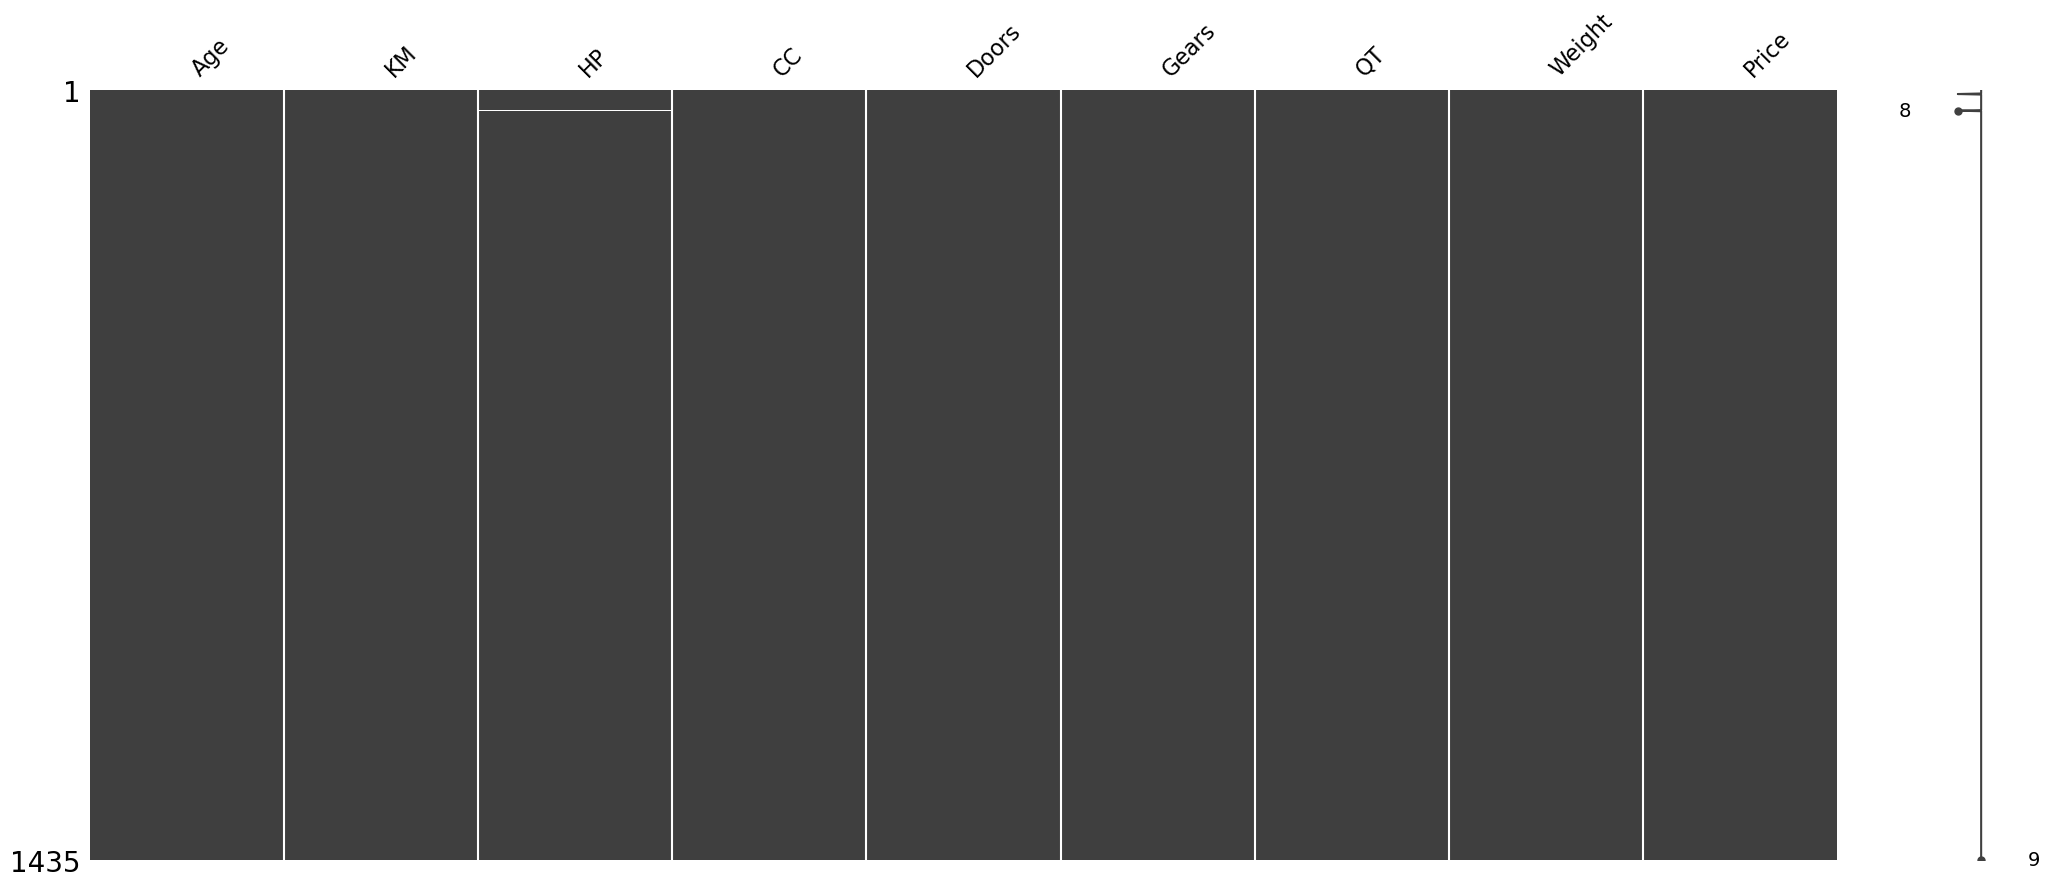

In [13]:
mn.matrix(raw_data)
plt.show()

In [14]:
raw_data['HP'] =raw_data['HP'].fillna(np.round(raw_data.HP.median(),2))
raw_data.isnull().sum()

Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
Price     0
dtype: int64

In [15]:
raw_data.isna().sum()

Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
Price     0
dtype: int64

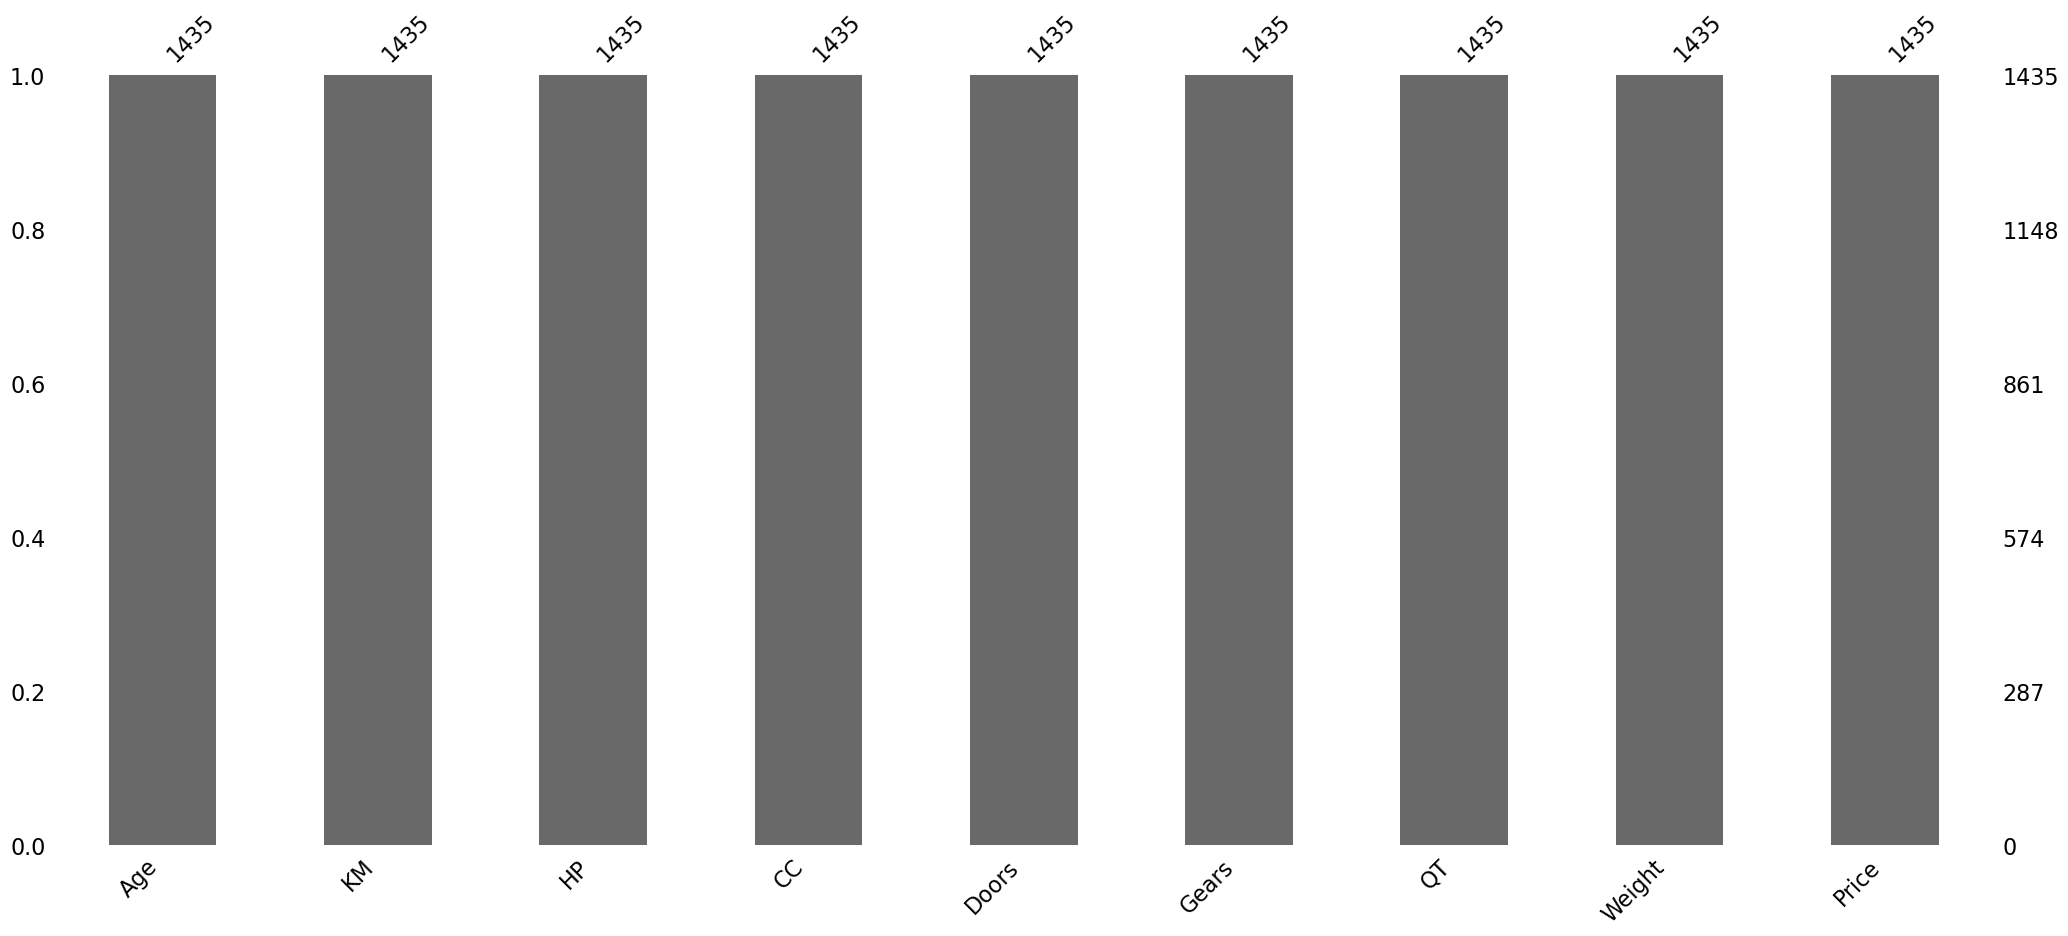

In [16]:
mn.bar(raw_data)
plt.show()

In [17]:
raw_data.describe()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,55.980488,68571.782578,101.514983,1576.560976,4.032753,5.026481,87.020209,1072.287108,10720.915679
std,18.563312,37491.094553,14.981216,424.387533,0.952667,0.188575,40.959588,52.251882,3608.732978
min,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000,8450.000000
50%,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000,9900.000000
75%,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000,11950.000000
max,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000,32500.000000


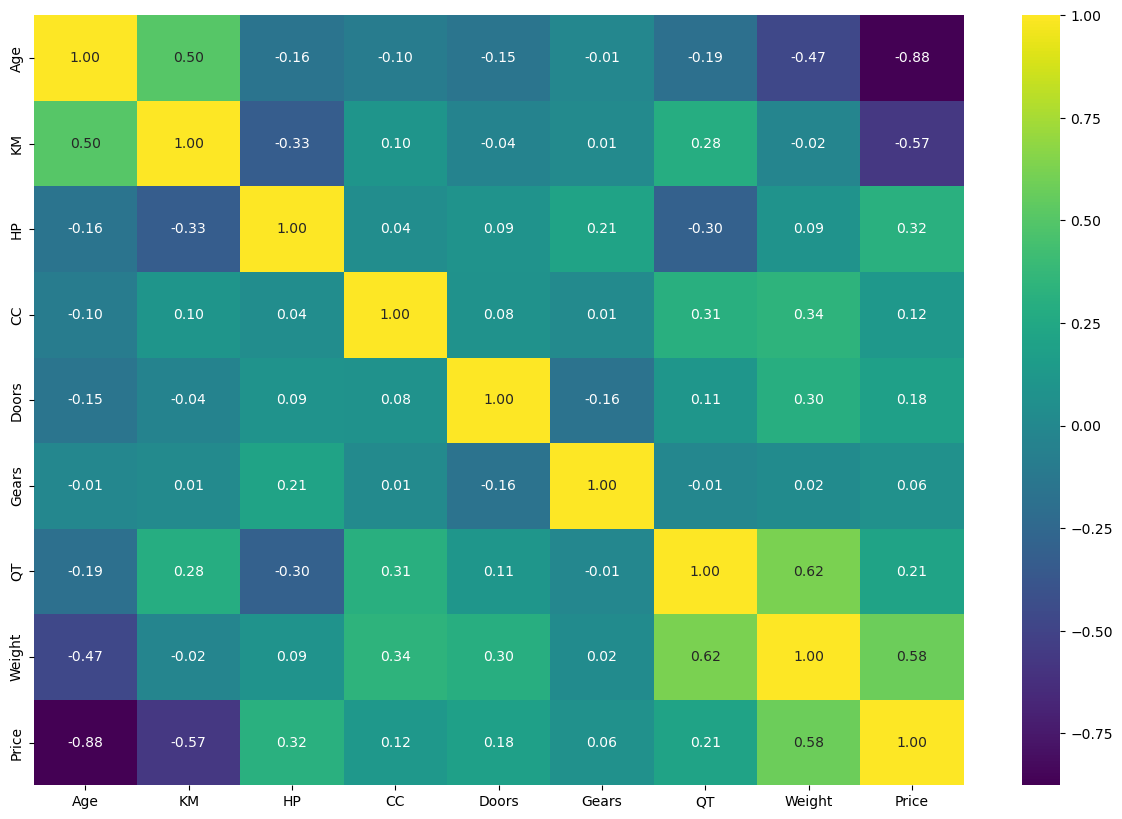

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(raw_data.corr(),annot=True,fmt='.2f',cmap='viridis')
plt.show()

###### We can see that Age,KM and Weight are good predictors for Target variables
###### Whereas Doors,CC and Gears have very less correlation with Price, hence they are very bad predictors
###### Age&Weight and Weight&QT have good correlation which might lead us to have multi collinearity problem

In [19]:
#plt.figure(figsize=(20,40))
#sns.pairplot(raw_data)
#plt.show()

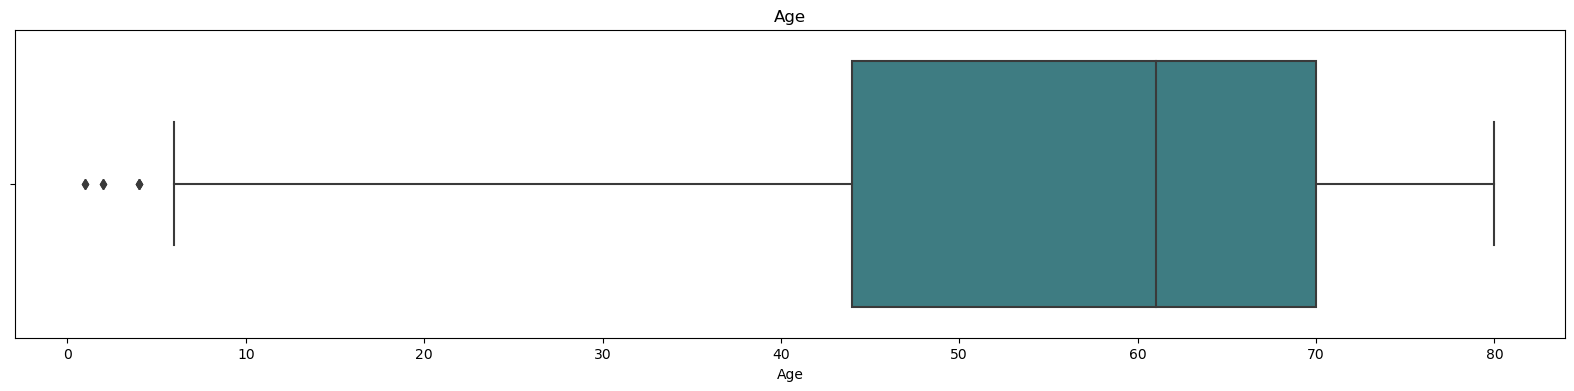

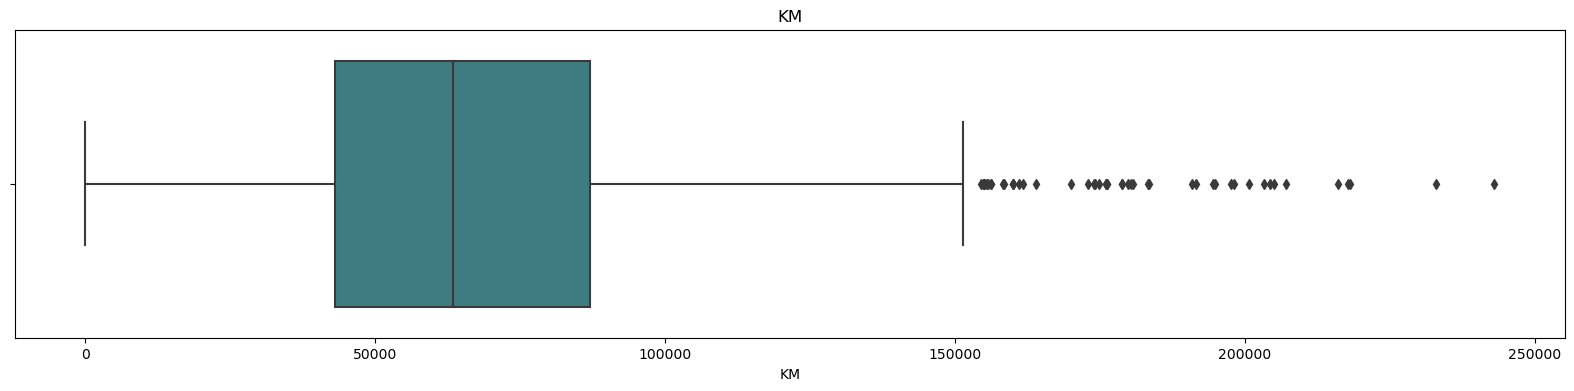

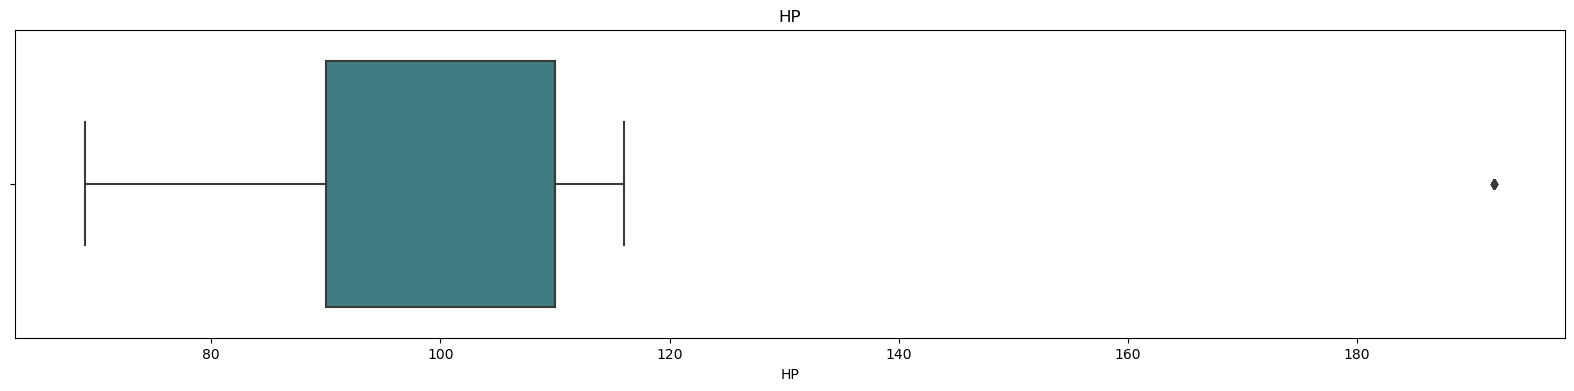

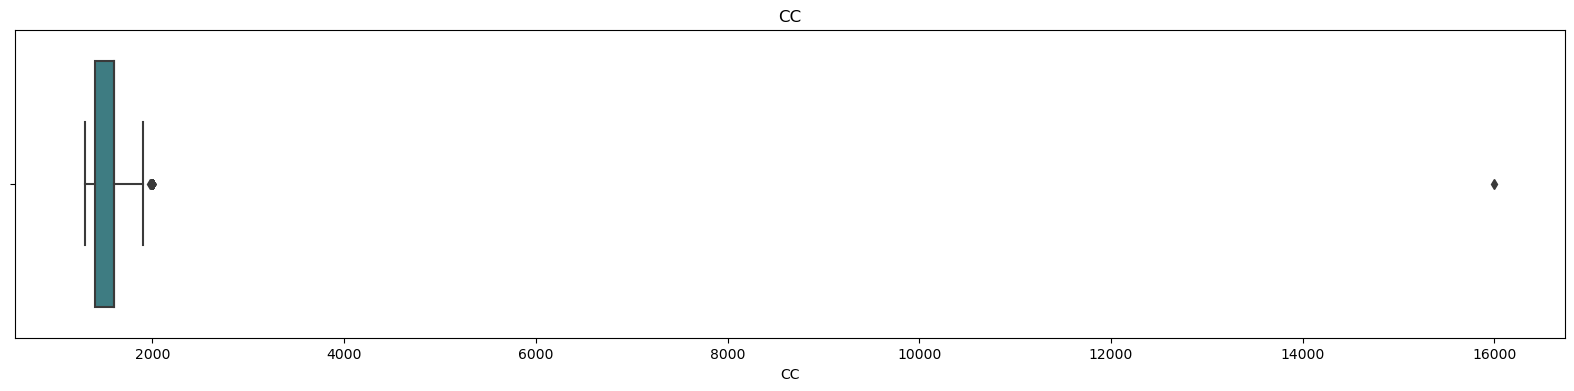

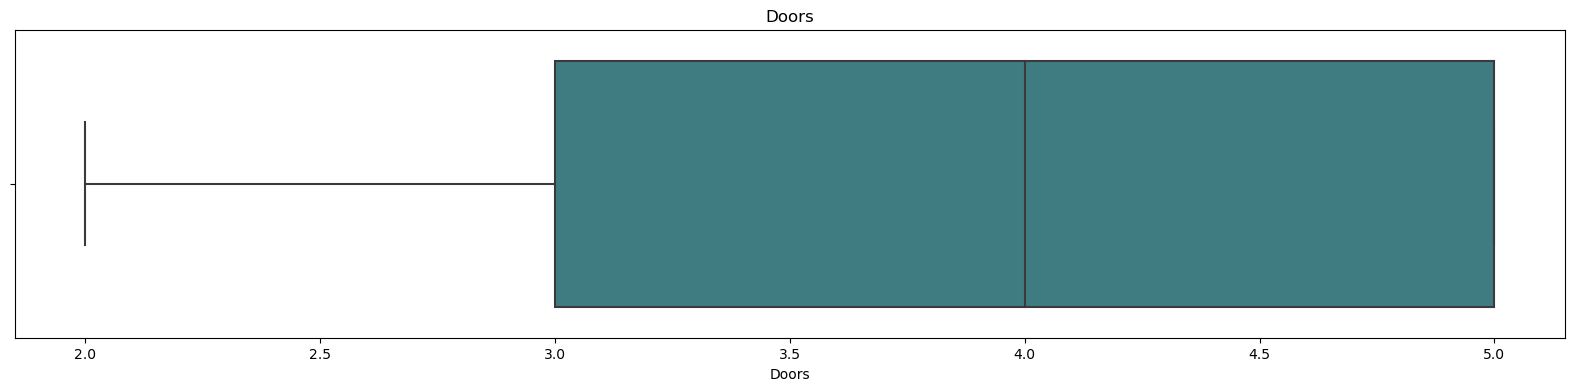

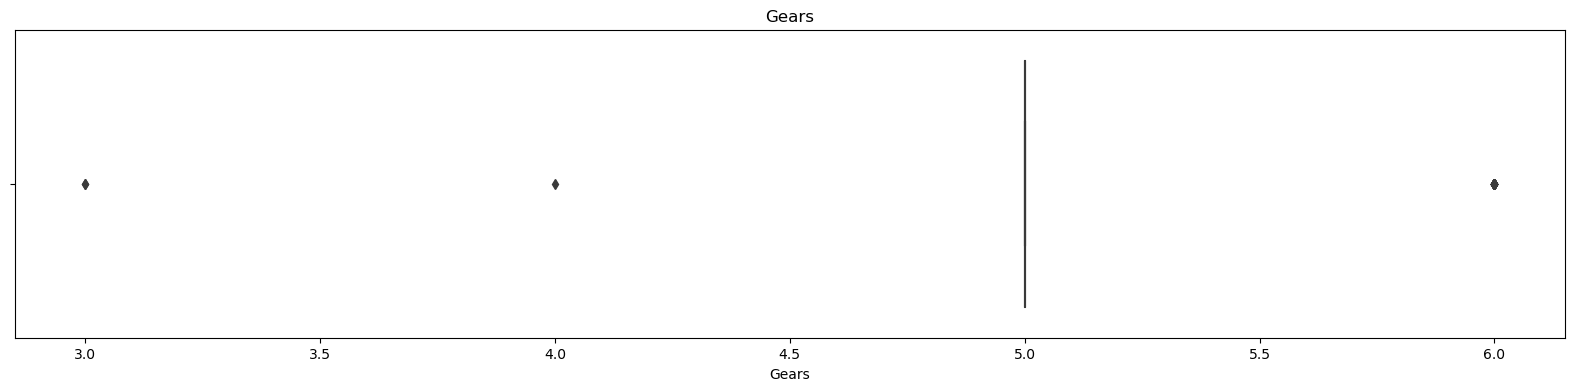

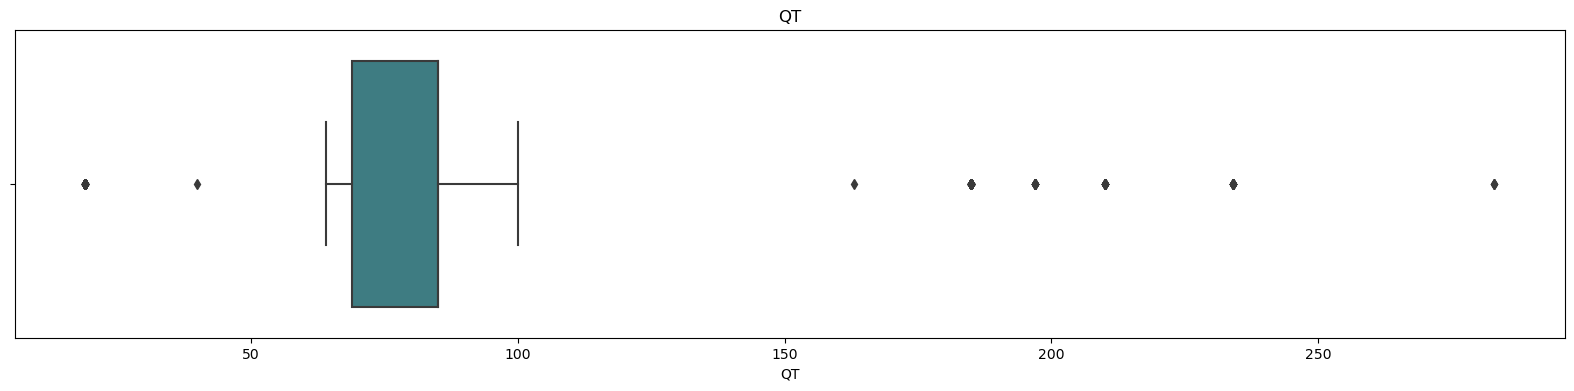

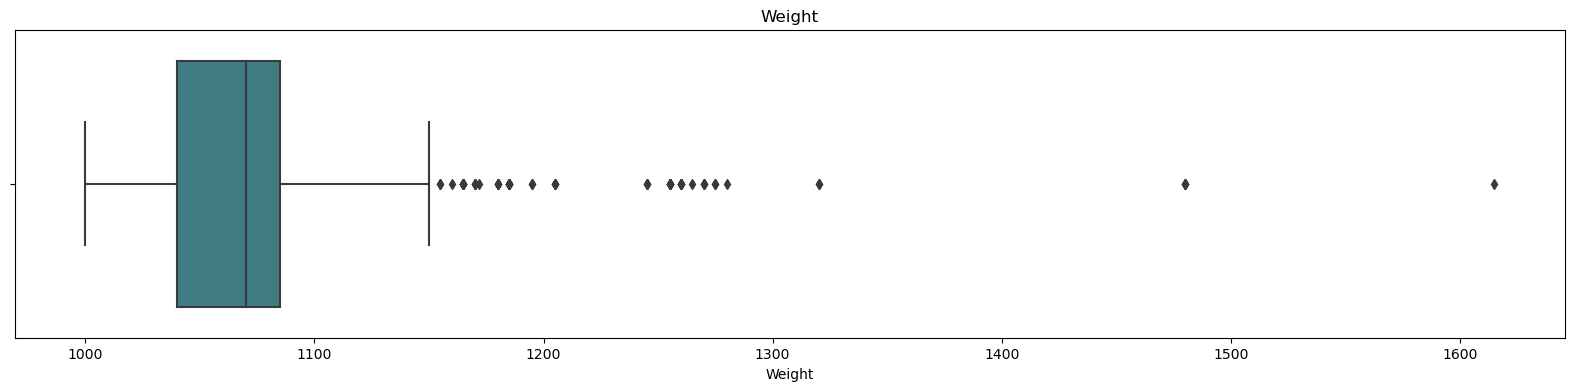

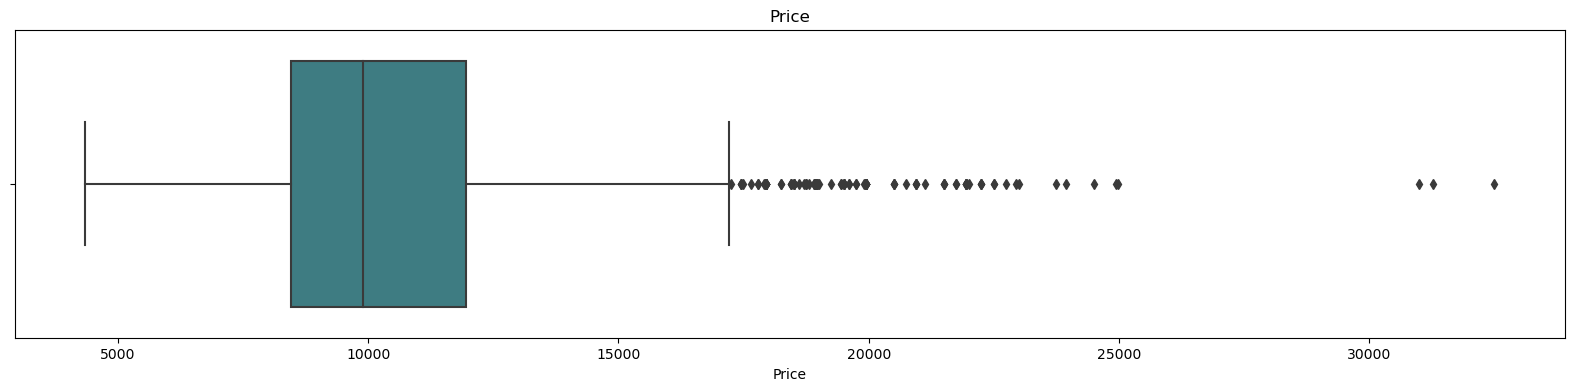

In [20]:
for i in raw_data.columns:
    plt.subplots(figsize=(20,4))
    sns.boxplot(raw_data[i],data=raw_data,palette='crest')
    plt.title(i)

###### From the data set we know that,some features have very less unique values. Let us check the unique values for those features and differentiate the features as continuous and discrete feature for our better understanding 

In [21]:
continuous_feature =[feature for feature in raw_data.columns if len(raw_data[feature].unique())>20]
print('Continuous Variables Count: ',(len(continuous_feature)))

Continuous Variables Count:  4


In [22]:
continuous_feature

['Age', 'KM', 'Weight', 'Price']

In [23]:
discrete_feature=[feature for feature in raw_data.columns if len(raw_data[feature].unique())<20]
print('Discrete Variables Count: ',(len(discrete_feature)))

Discrete Variables Count:  5


In [24]:
discrete_feature

['HP', 'CC', 'Doors', 'Gears', 'QT']

In [25]:
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    data[feature].hist()
    plt.subplot(122)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()
    return

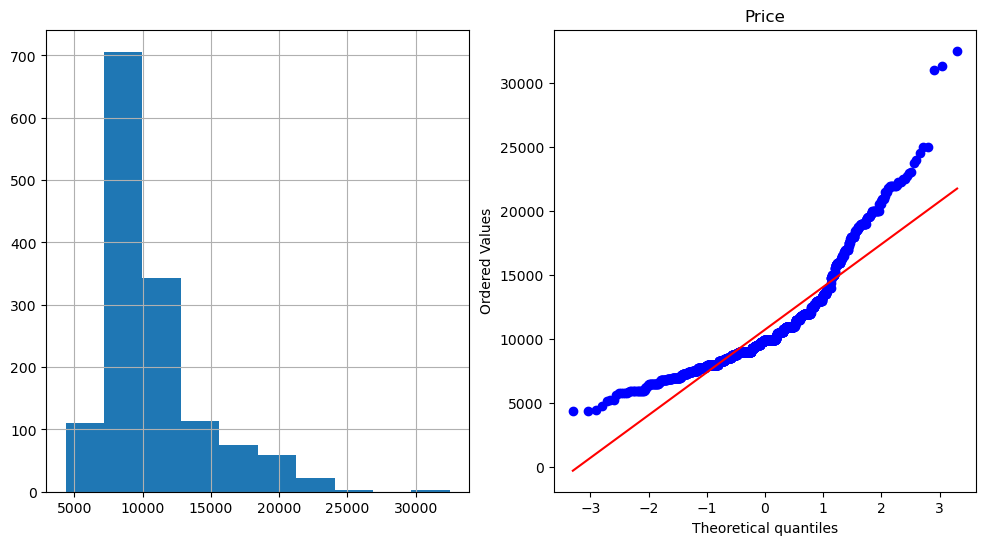

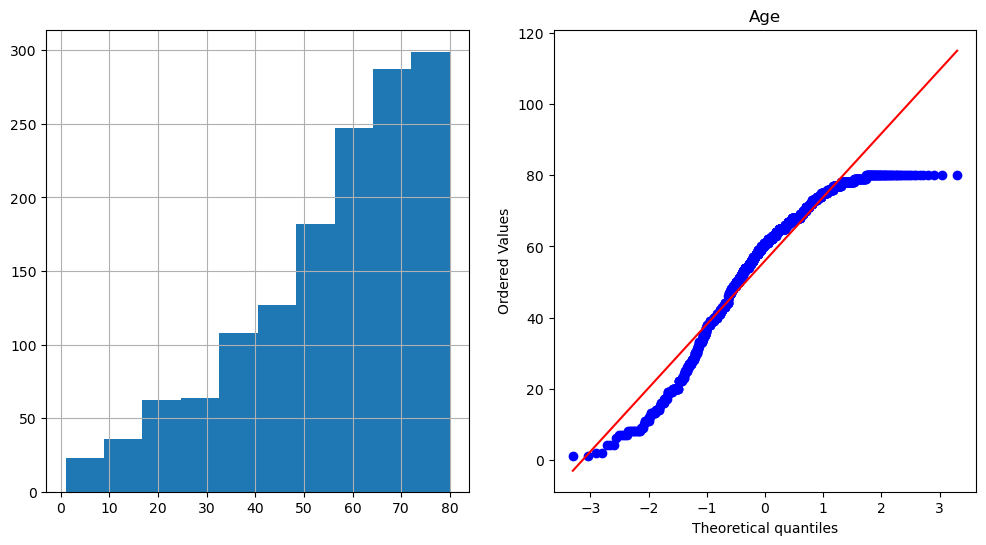

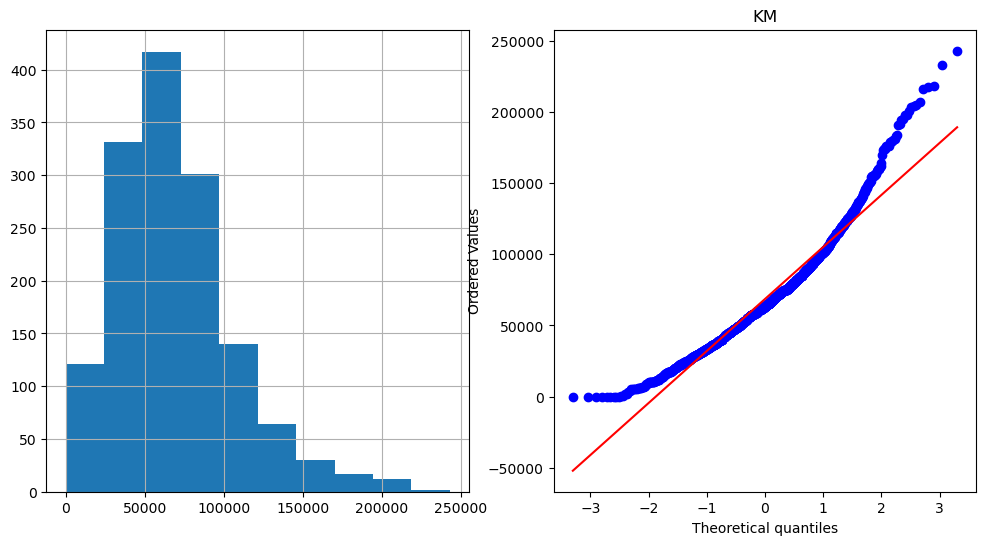

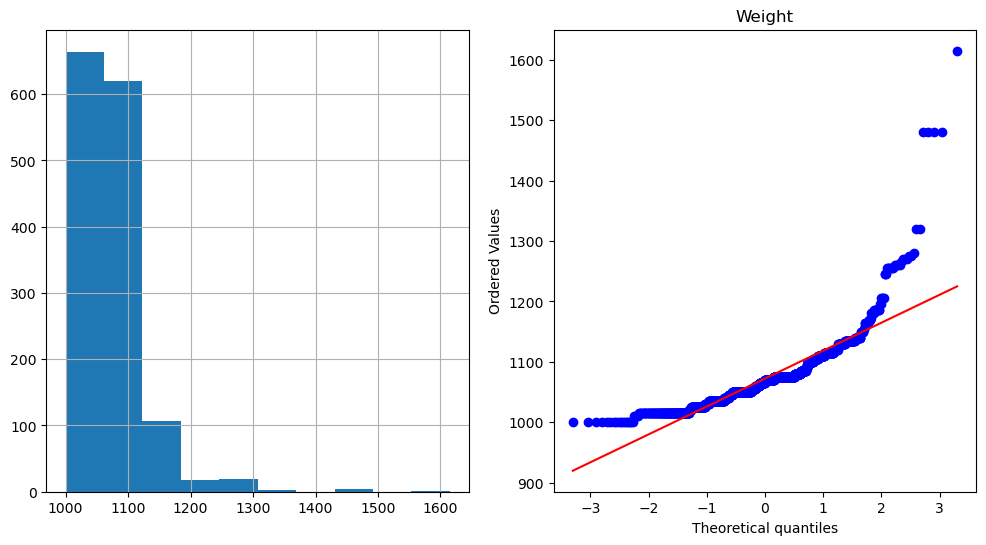

In [26]:
plot_data(raw_data,'Price')

plot_data(raw_data,'Age')

plot_data(raw_data,'KM')

plot_data(raw_data,'Weight')



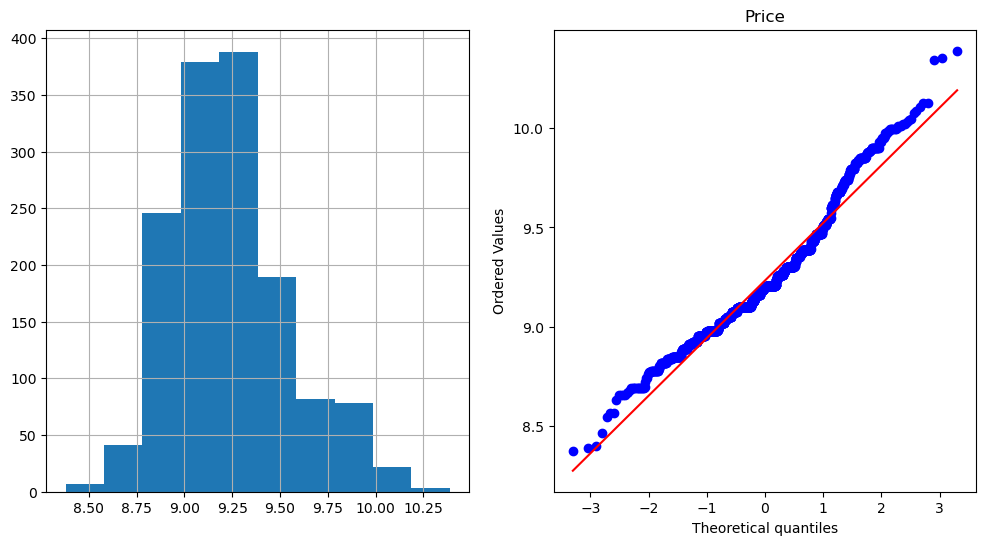

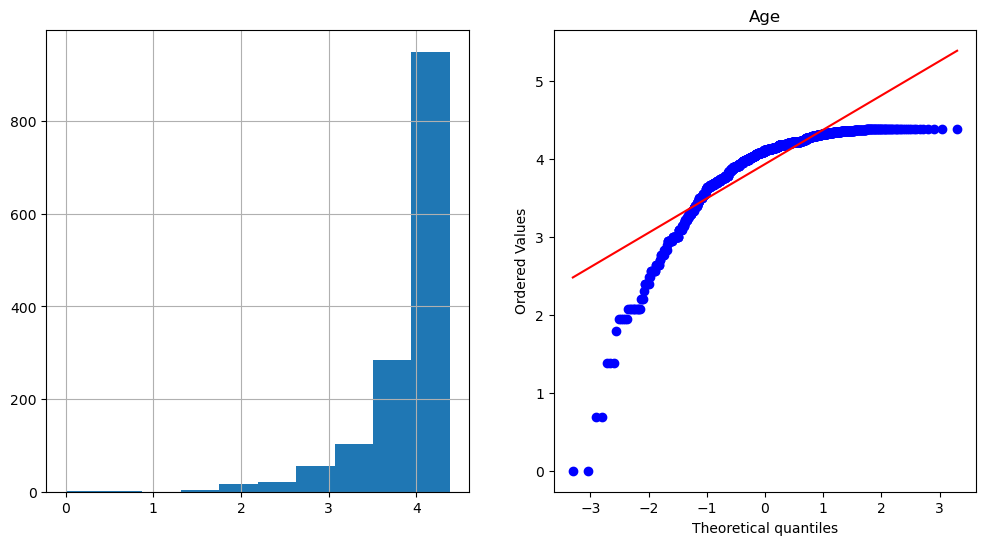

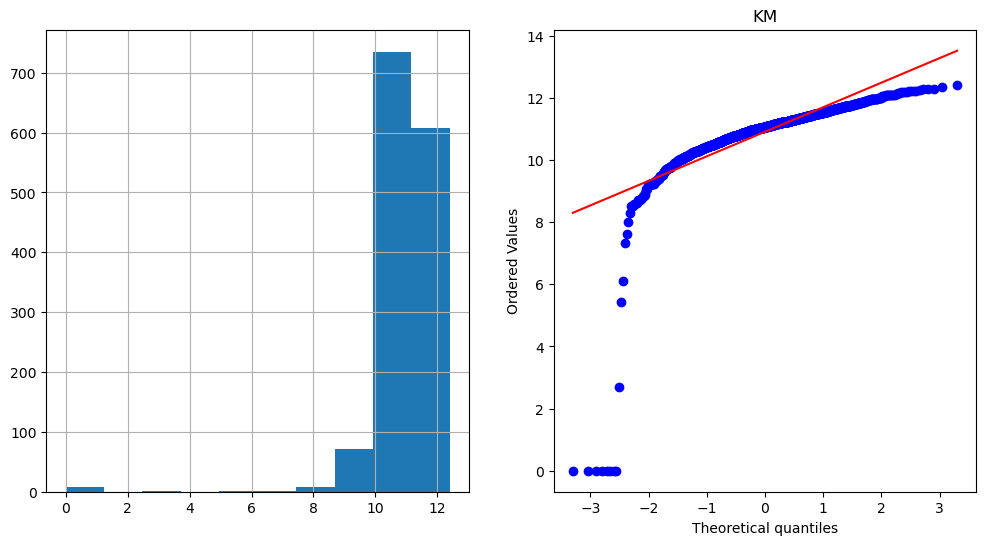

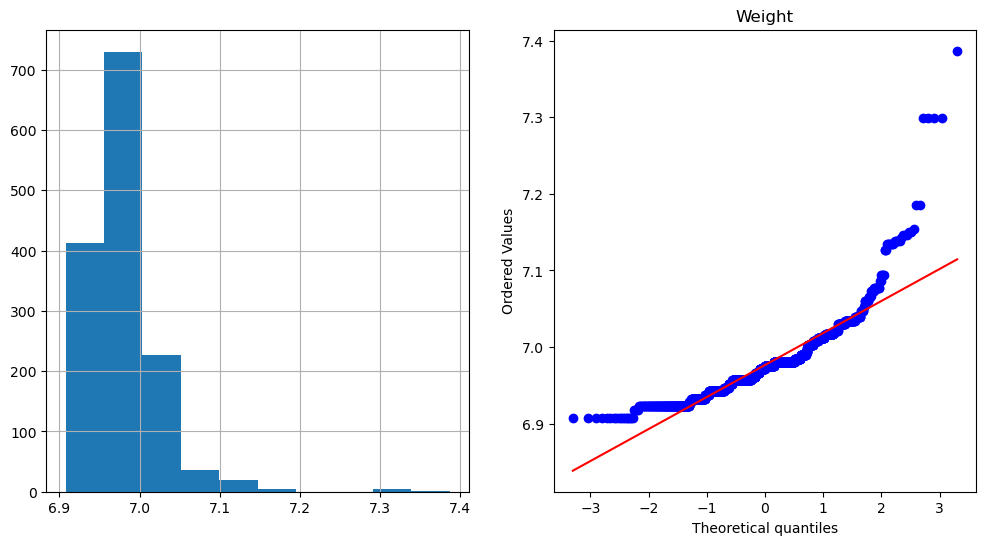

In [27]:
df=raw_data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'Price')
plot_data(df,'Age')
plot_data(df,'KM')
plot_data(df,'Weight')

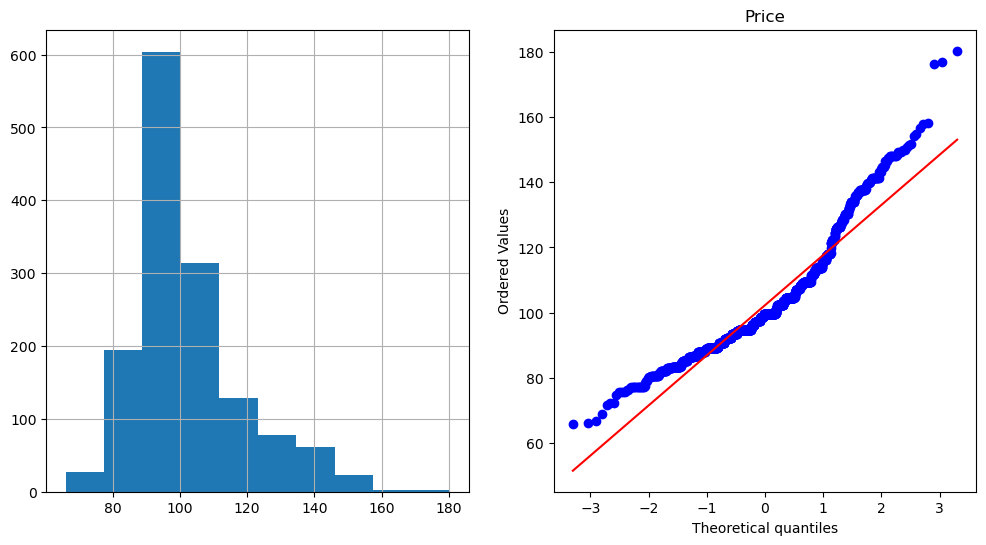

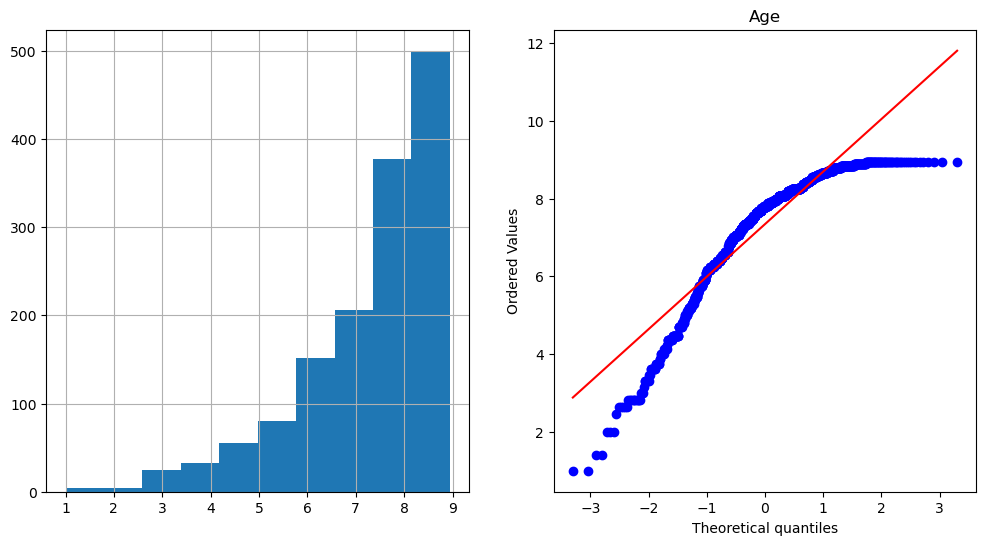

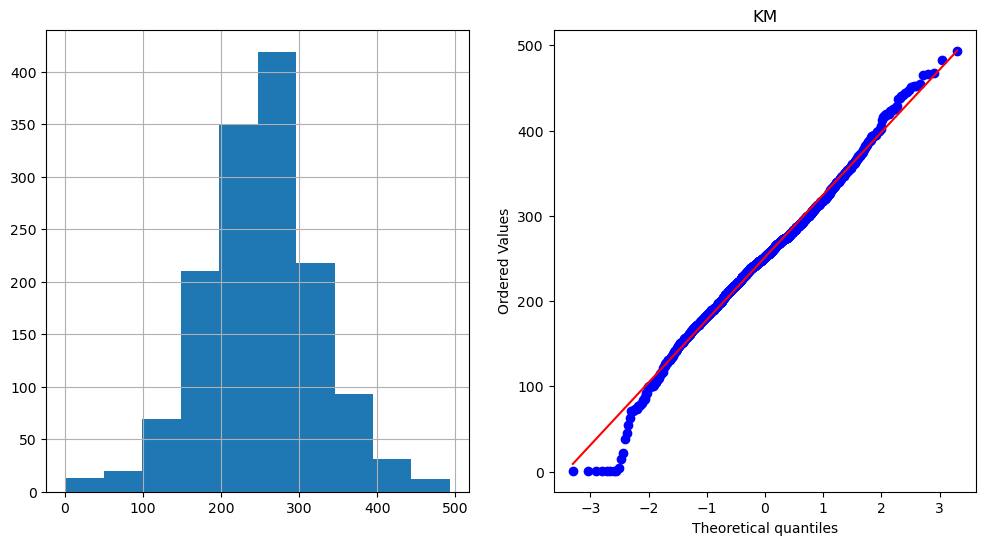

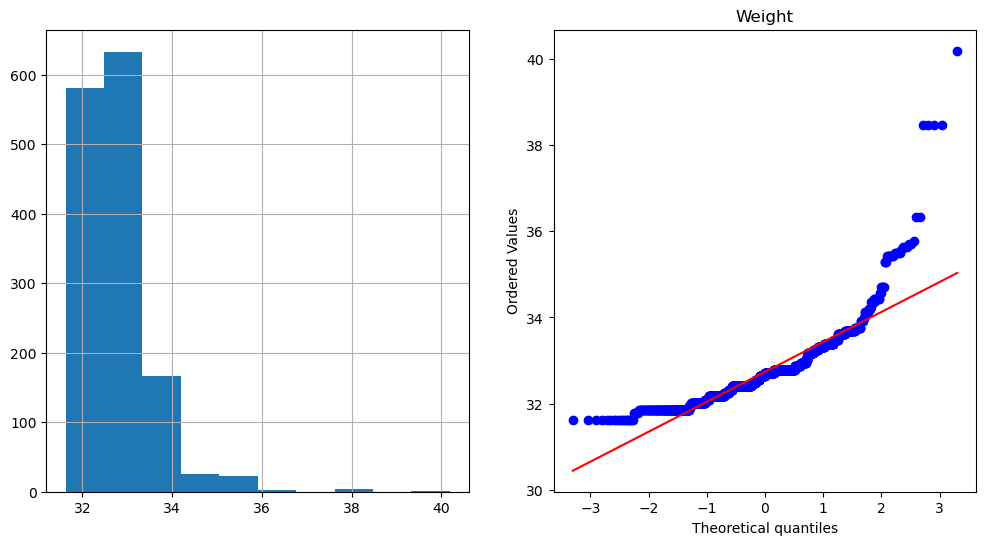

In [28]:
df=raw_data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plot_data(df,'Age')
plot_data(df,'KM')
plot_data(df,'Weight')

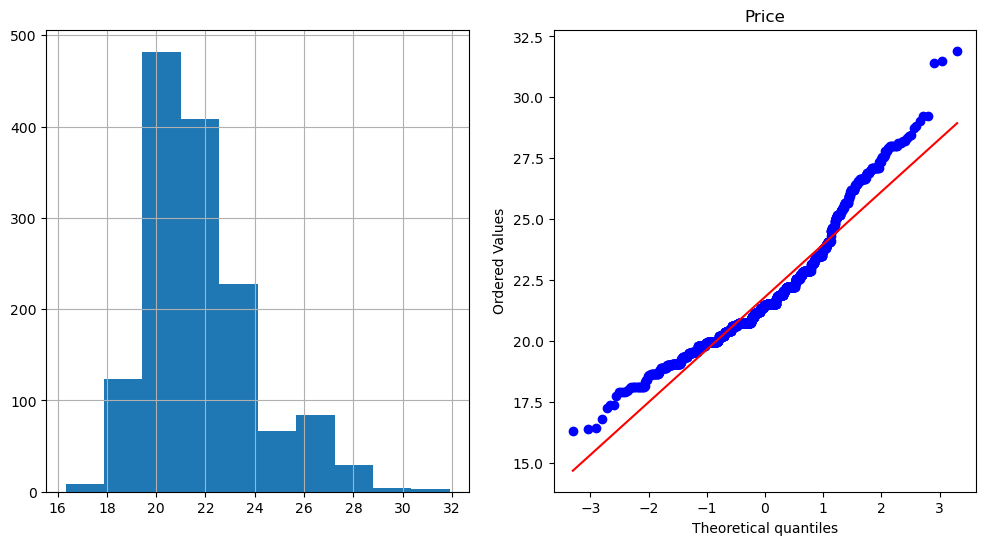

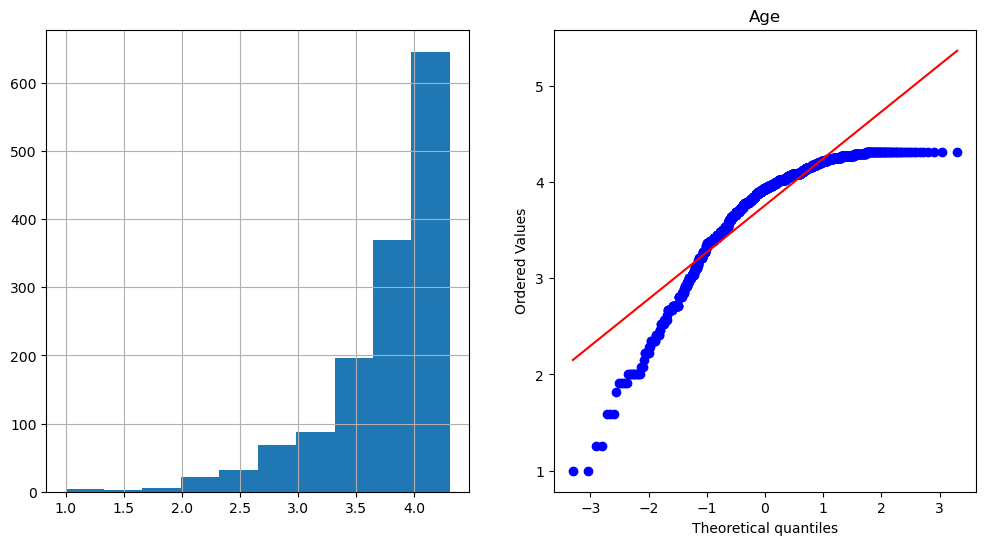

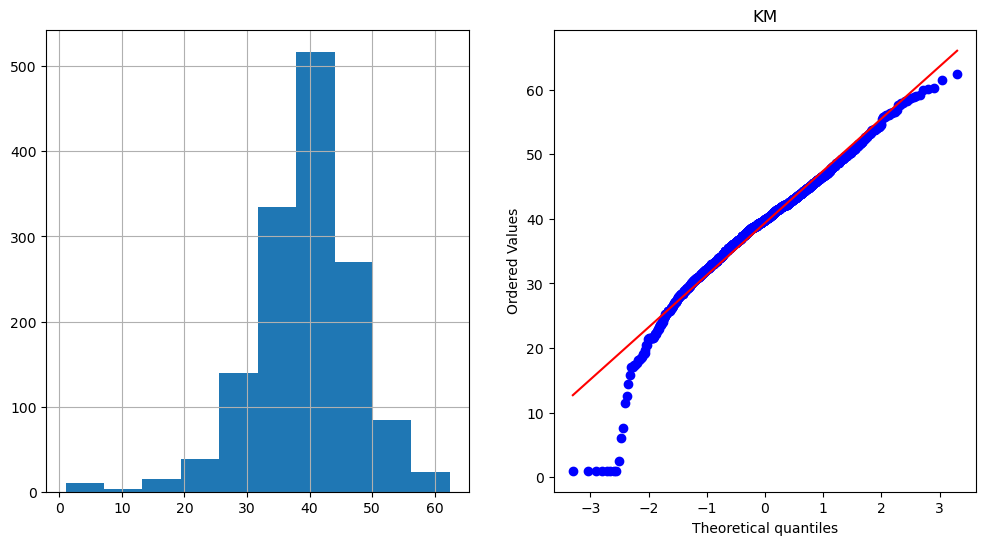

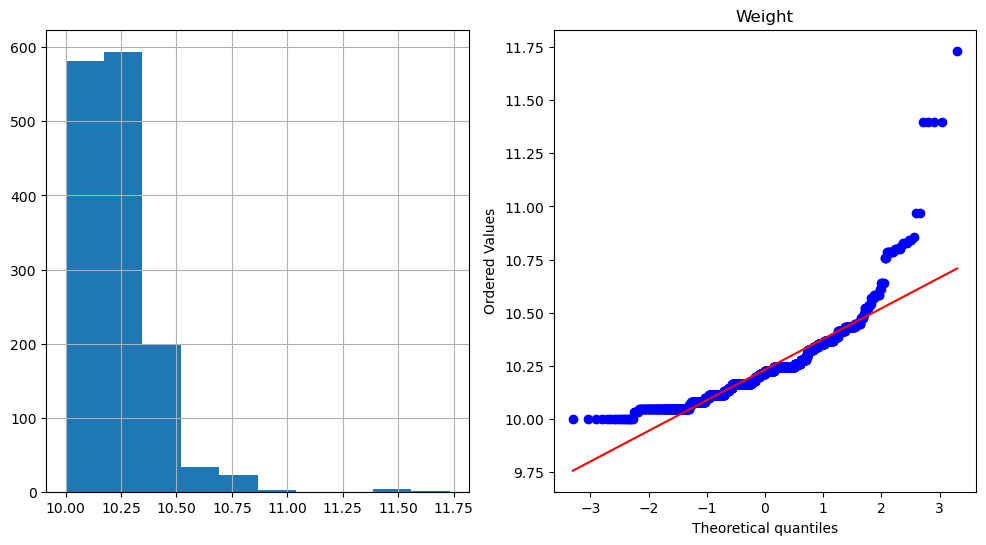

In [29]:
df=raw_data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'Price')
plot_data(df,'Age')
plot_data(df,'KM')
plot_data(df,'Weight')

In [30]:


#perform Shapiro-Wilk test
print('Price feature',shapiro(raw_data.Price),'\n'
     'Age feature',shapiro(raw_data.Age),'\n'
     'Weight feature',shapiro(raw_data.Weight),'\n'
     'KM feature',shapiro(raw_data.KM))

Price feature ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age feature ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
Weight feature ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40) 
KM feature ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22)


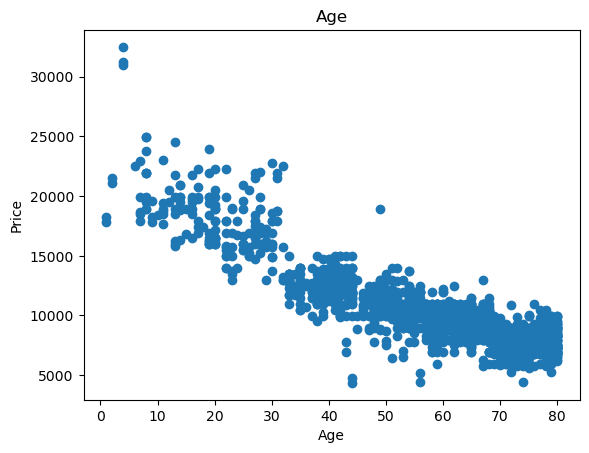

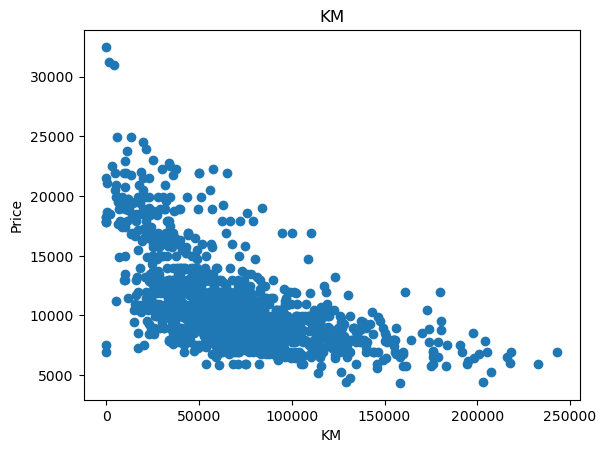

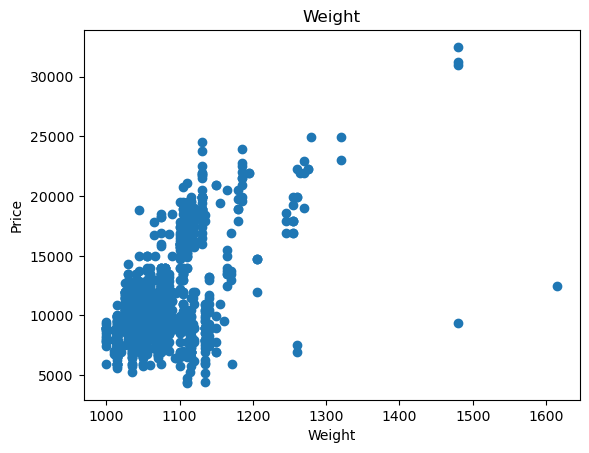

In [31]:
for feature in continuous_feature:
    if feature!="Price":
        df=raw_data.copy()
        plt.subplots()
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

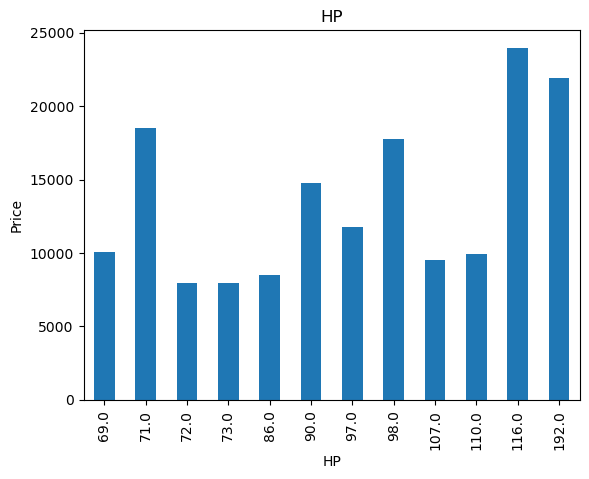

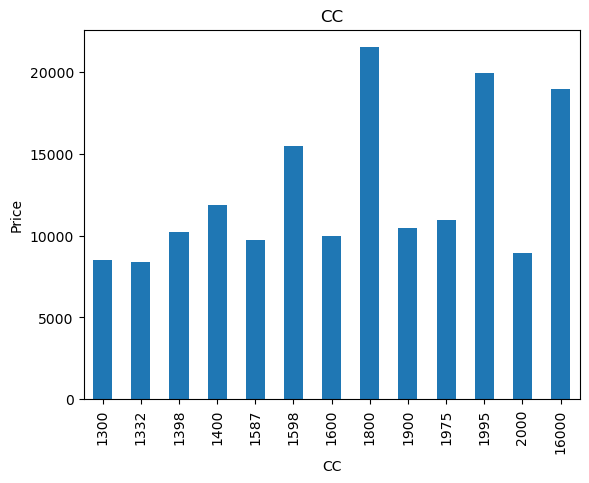

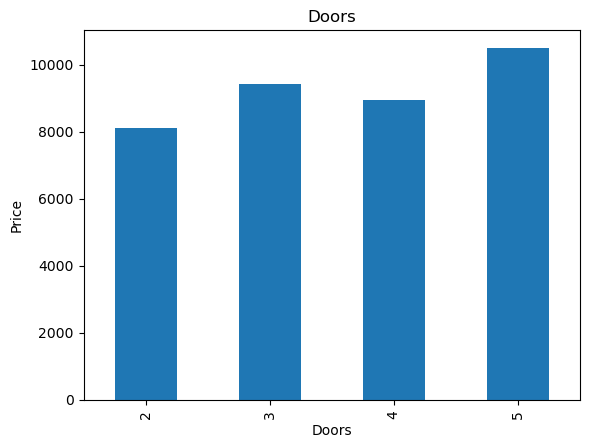

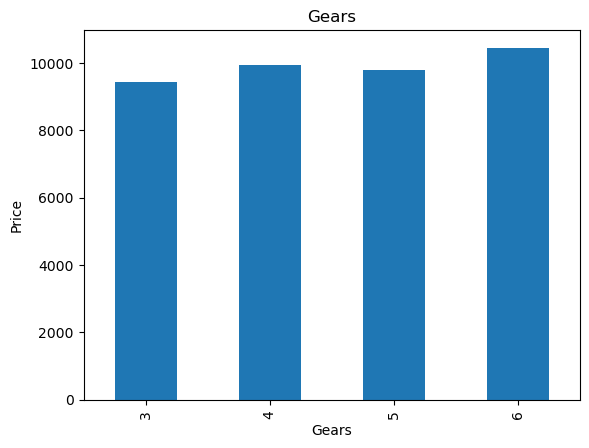

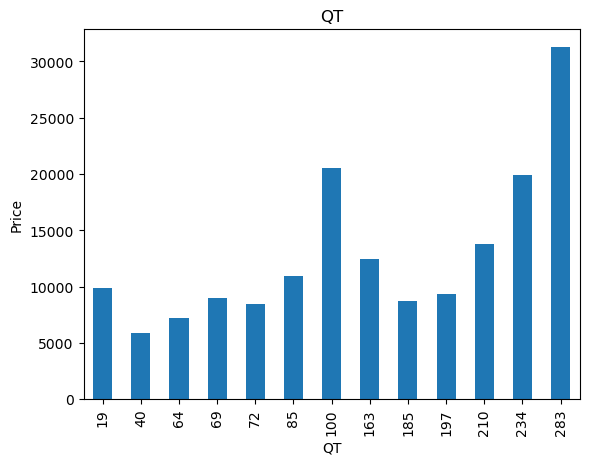

In [32]:
for feature in discrete_feature:
    df=raw_data.copy()
    df.groupby(feature)["Price"].median().plot.bar() #This statement groupby each feature and Price column, then it creates barplot between each group of the feature and median value of that group's price
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()


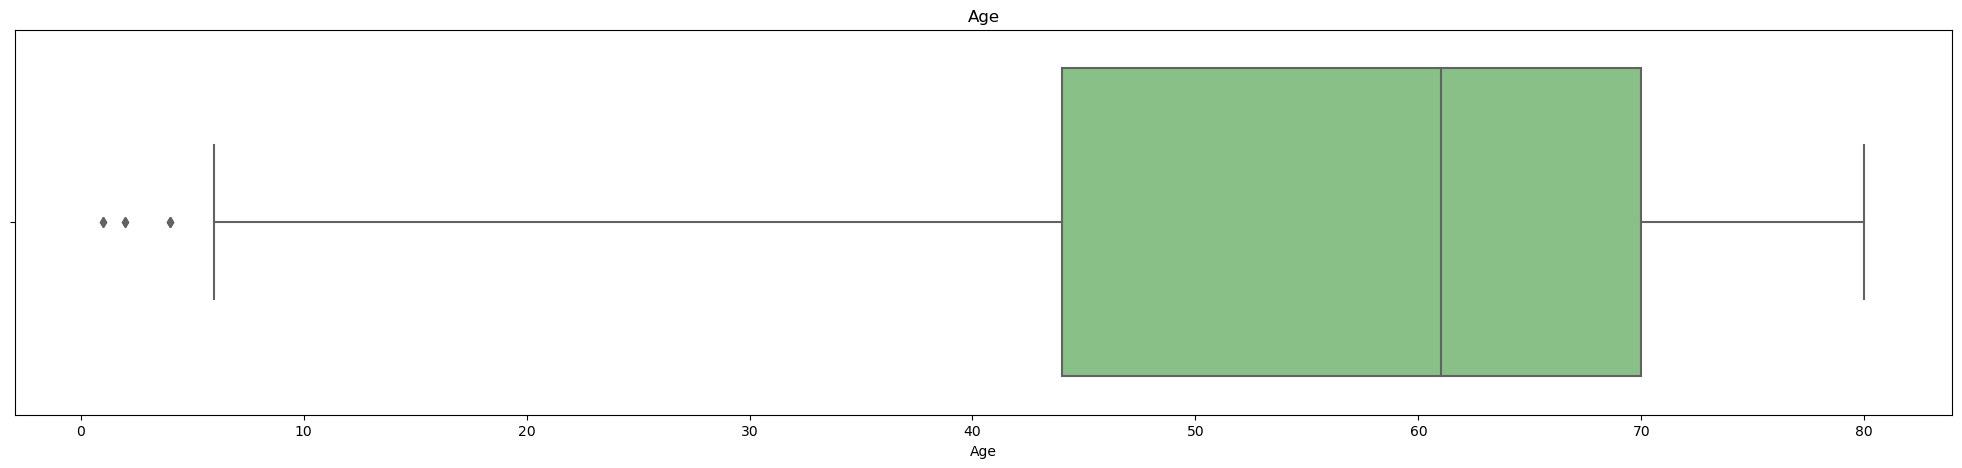

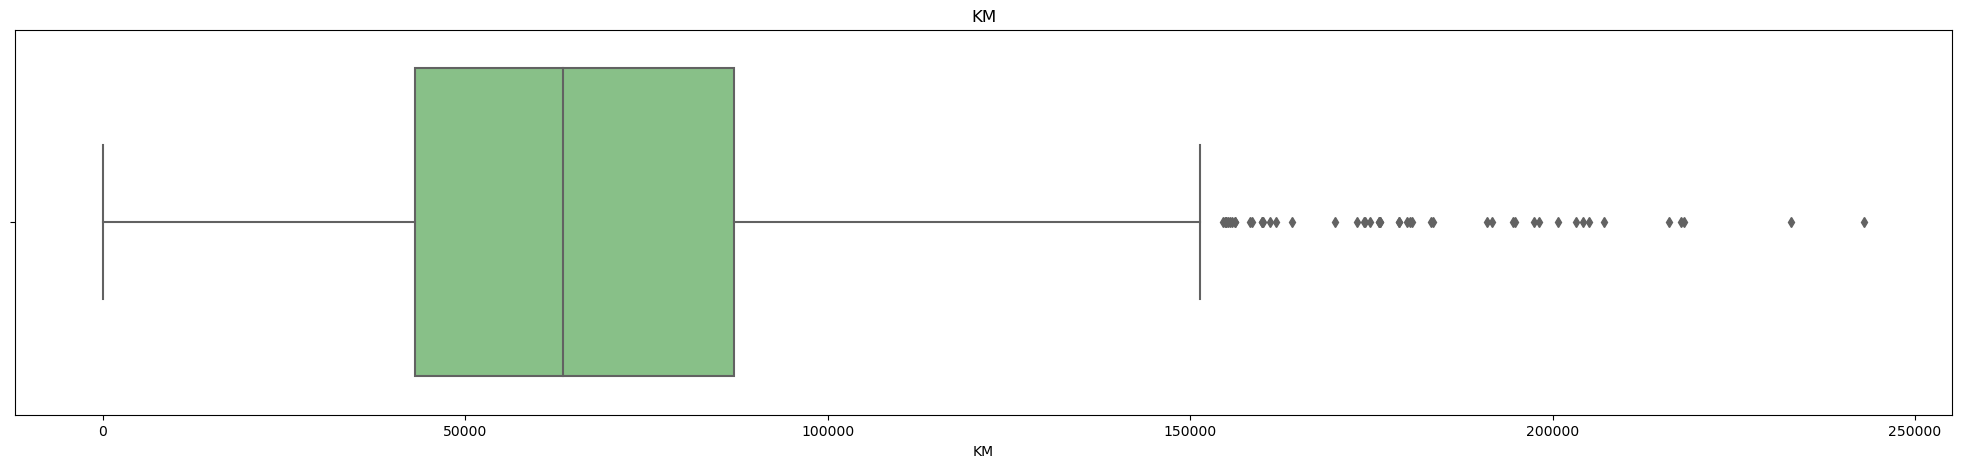

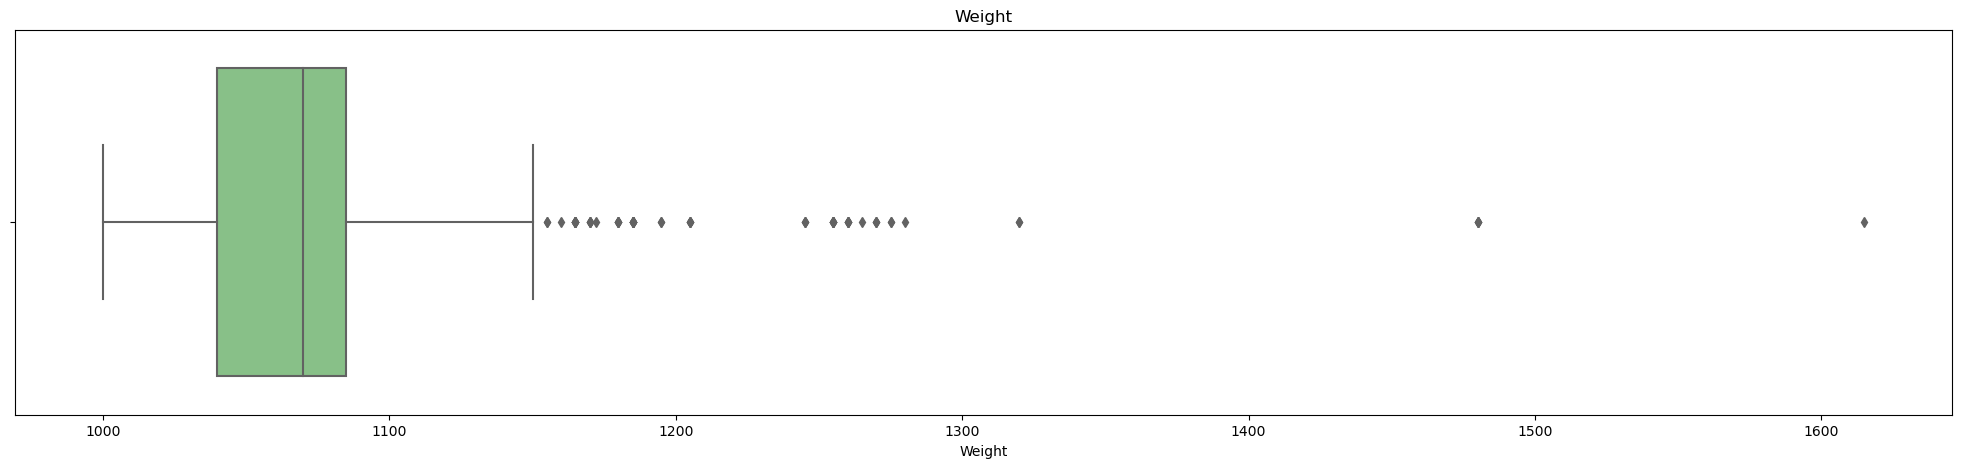

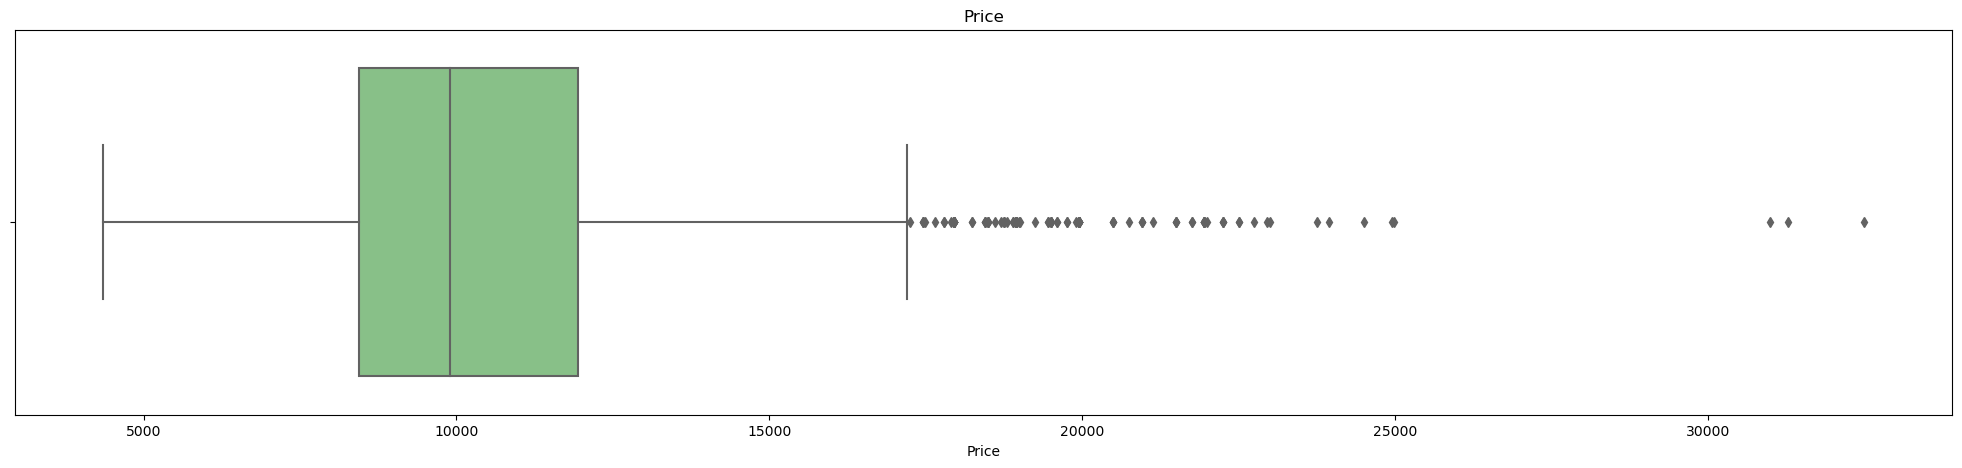

In [33]:
df=raw_data.copy() 
for feature in continuous_feature:
    plt.subplots(figsize=(25,5))
    sns.boxplot(feature,data=df,palette='Accent')
    plt.title(feature)
    plt.show()

###### We can see there are so many outliers in each column. As the given data is limited, we can't simply drop the outliers. So we will perform Data Transformation techniques to get rid of the outliers. Before Handling Outliers, let us build a model with raw data and check it's r-squared values to compare with other models

In [34]:
raw_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=raw_data).fit()
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1120.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:45:06   Log-Likelihood:                -12365.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5440.4452   1411.707     -3.854      0.000   -8209.690   -2671.200
Age         -121.7103      2.613    -46.575      0.000    -126.836    -116.584
KM            -0.0207      0.001    -16.541      0.000      -0.023      -0.018
HP            31.7564      2.815     11.279      0.000      26.234      37.279
CC            -0.1184      0.090     -1.315      0.189      -0.295       0.058
Doors          0.4241     39.959      0.011      0.992     -77.960      78.808
Gears        596.7341    196.826      3.032      0.002     210.635     982.833
QT             3.8764      1.310      2.960      0.003       1.308       6.445
Weight        16.8048      1.070     15.710      0.000      14.707      18.903
==============================================================================
Omnibus:                      148.737   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              993.448
Skew:                          -0.199   Prob(JB):                    1.89e-216
Kurtosis:                       7.057   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

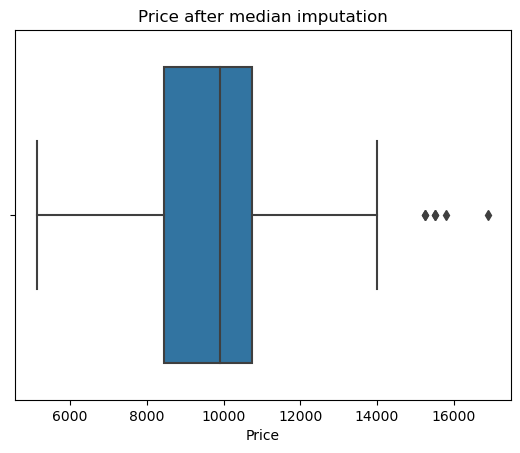

In [35]:
df1=raw_data.copy()
for i in raw_data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

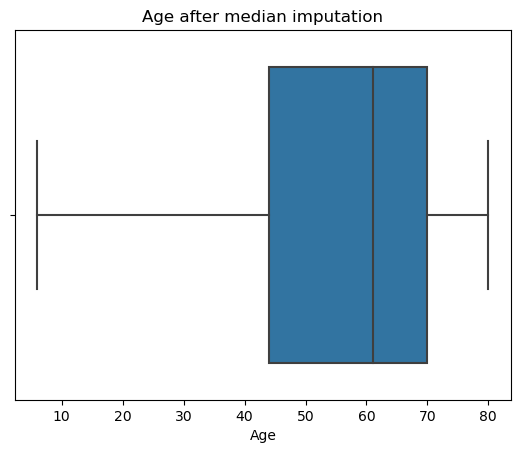

In [36]:
for i in raw_data['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    med = np.median(df1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age'] = df1['Age'].replace(i, np.median(df1['Age']))
sns.boxplot(df1['Age'])
plt.title('Age after median imputation')
plt.show()

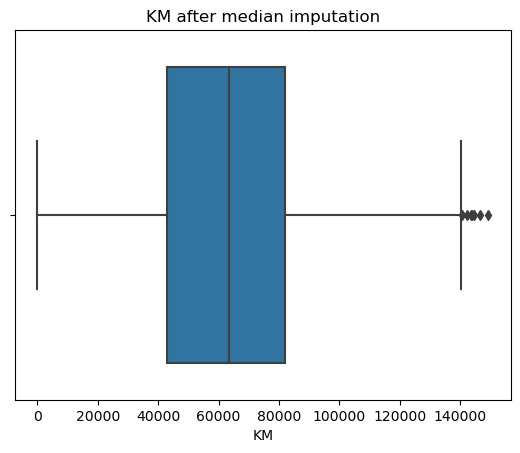

In [37]:
for i in raw_data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

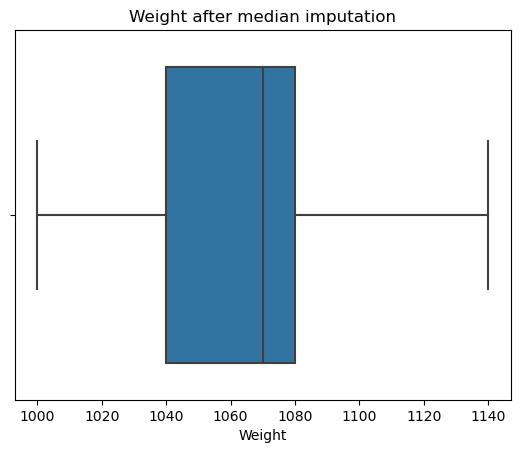

In [38]:
for i in raw_data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

In [39]:
after_median_imputation_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df1).fit()
after_median_imputation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          2.57e-136
Time:                        14:45:10   Log-Likelihood:                -12454.
No. Observations:                1435   AIC:                         2.493e+04
Df Residuals:                    1426   BIC:                         2.497e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.432e+04   1843.356      7.769      0.000    1.07e+04    1.79e+04
Age          -53.3003      2.696    -19.770      0.000     -58.589     -48.012
KM            -0.0046      0.002     -2.962      0.003      -0.008      -0.002
HP             8.2927      2.835      2.925      0.003       2.732      13.854
CC            -0.0520      0.095     -0.545      0.586      -0.239       0.135
Doors        281.2760     44.869      6.269      0.000     193.259     369.293
Gears        511.0276    209.212      2.443      0.015     100.631     921.424
QT             0.9325      1.146      0.814      0.416      -1.316       3.180
Weight        -5.5573      1.525     -3.643      0.000      -8.550      -2.565
==============================================================================
Omnibus:                       14.787   Durbin-Watson:                   1.121
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.142
Skew:                           0.250   Prob(JB):                     0.000515
Kurtosis:                       2.938   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

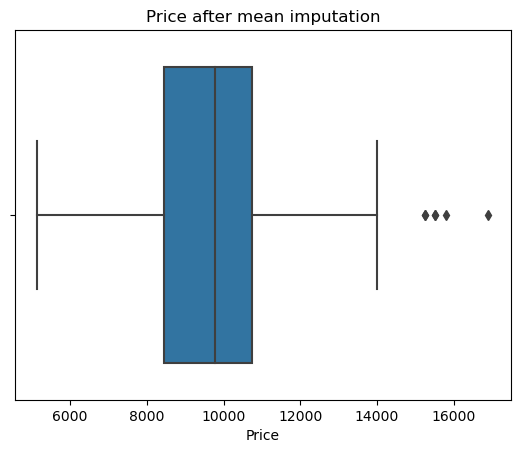

In [40]:
df2=raw_data.copy()
for i in raw_data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()

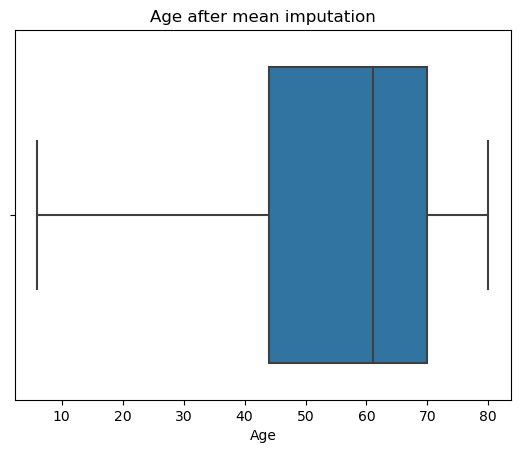

In [41]:
for i in raw_data['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age'] = df2['Age'].replace(i, np.mean(df2['Age']))
sns.boxplot(df2['Age'])
plt.title('Age after mean imputation')
plt.show()

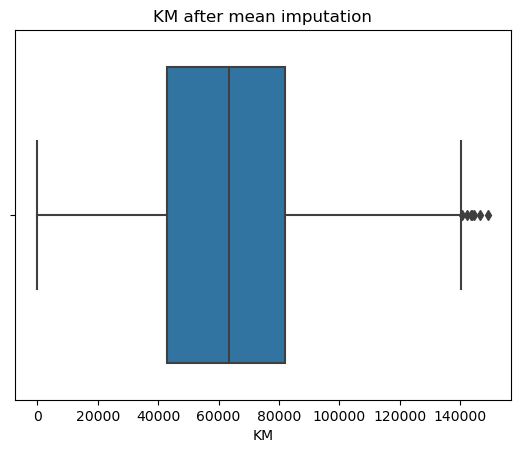

In [42]:
for i in raw_data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

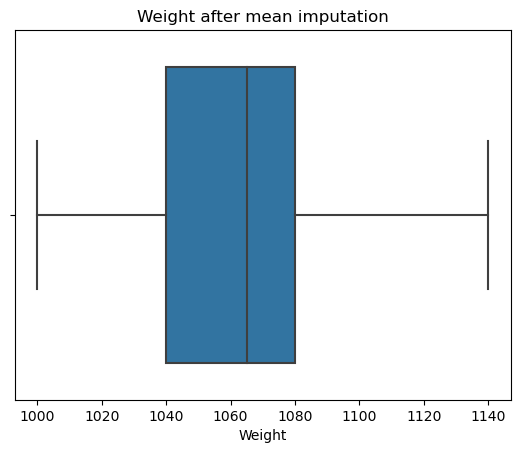

In [43]:
for i in raw_data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

In [44]:
after_mean_imputation_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df2).fit()
after_mean_imputation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     125.9
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          1.51e-159
Time:                        14:45:13   Log-Likelihood:                -12409.
No. Observations:                1435   AIC:                         2.484e+04
Df Residuals:                    1426   BIC:                         2.488e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.341e+04   1783.520      7.517      0.000    9908.035    1.69e+04
Age          -56.3068      2.629    -21.416      0.000     -61.464     -51.149
KM            -0.0050      0.002     -3.307      0.001      -0.008      -0.002
HP            10.1916      2.749      3.707      0.000       4.798      15.585
CC            -0.0484      0.092     -0.524      0.600      -0.230       0.133
Doors        260.5739     43.425      6.001      0.000     175.390     345.758
Gears        534.9950    202.785      2.638      0.008     137.205     932.785
QT             1.2031      1.111      1.083      0.279      -0.976       3.382
Weight        -4.7211      1.474     -3.203      0.001      -7.613      -1.830
==============================================================================
Omnibus:                       11.625   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.720
Skew:                           0.221   Prob(JB):                      0.00285
Kurtosis:                       3.033   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
df3 = raw_data.copy()
def drop_outliers(data,col):
    upper_extreme = np.quantile(data[col],0.75) + 1.5*((np.quantile(data[col],0.75))-(np.quantile(data[col],0.25)))
    lower_extreme = np.quantile(data[col],0.25) - 1.5*((np.quantile(data[col],0.75))-(np.quantile(data[col],0.25)))
    data.drop(data[data[col]> upper_extreme].index, inplace=True)
    data.drop(data[data[col]< lower_extreme].index, inplace=True)

Text(0.5, 1.0, 'Price after removing outliers')

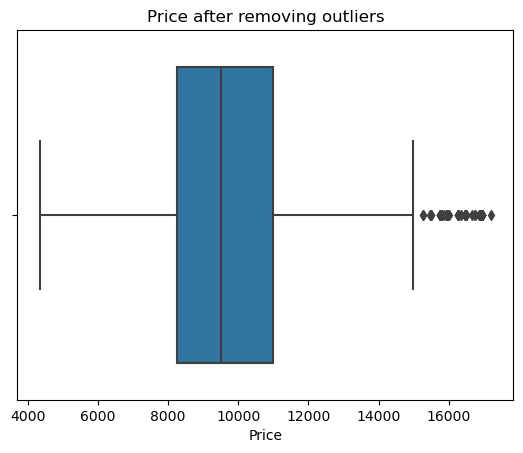

In [46]:
drop_outliers(df3, 'Price')
sns.boxplot(df3.Price)
plt.title('Price after removing outliers')

Text(0.5, 1.0, 'Age after removing outliers')

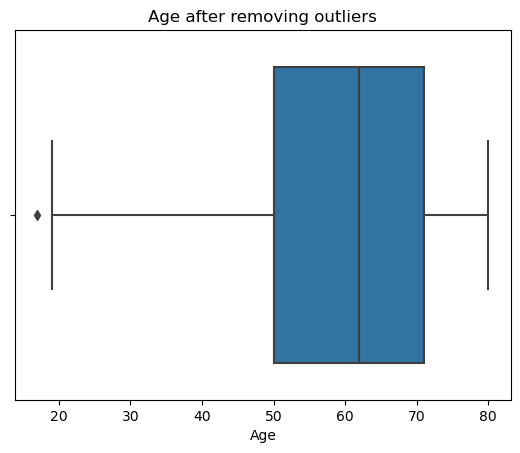

In [47]:
drop_outliers(df3, 'Age')
sns.boxplot(df3.Age)
plt.title('Age after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

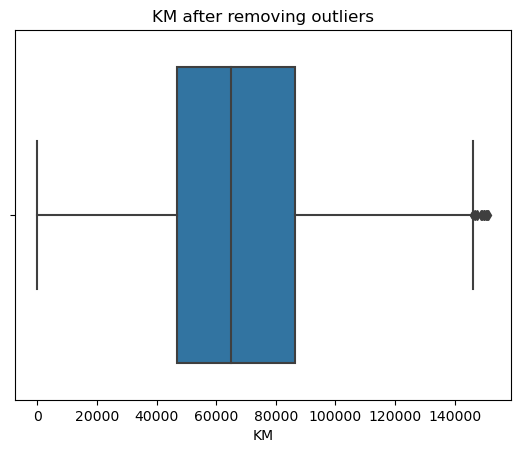

In [48]:
drop_outliers(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers')

Text(0.5, 1.0, 'Weight after removing outliers')

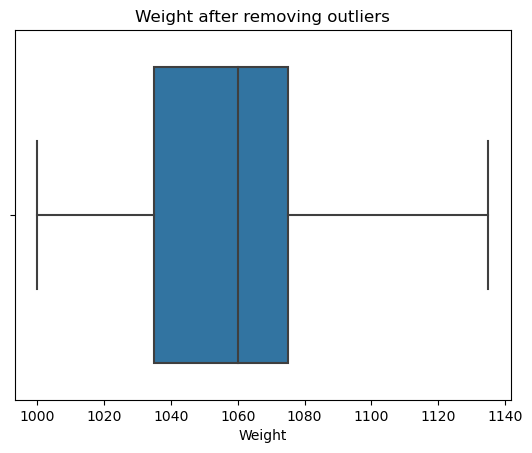

In [49]:
drop_outliers(df3, 'Weight')
sns.boxplot(df3.Weight)
plt.title('Weight after removing outliers')

In [50]:
df3.shape

(1232, 9)

In [51]:
removed_outlier_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df3).fit()
removed_outlier_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     596.7
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:45:14   Log-Likelihood:                -10275.
No. Observations:                1232   AIC:                         2.057e+04
Df Residuals:                    1223   BIC:                         2.061e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5293.0389   1694.515     -3.124      0.002   -8617.518   -1968.560
Age         -102.7926      2.399    -42.853      0.000    -107.499     -98.087
KM            -0.0156      0.001    -12.845      0.000      -0.018      -0.013
HP            25.6238      3.061      8.371      0.000      19.619      31.629
CC            -2.4268      0.313     -7.756      0.000      -3.041      -1.813
Doors        -57.9400     36.684     -1.579      0.114    -129.910      14.030
Gears        507.6911    156.629      3.241      0.001     200.399     814.983
QT             5.4069      1.407      3.844      0.000       2.647       8.167
Weight        19.6351      1.697     11.570      0.000      16.306      22.965
==============================================================================
Omnibus:                       25.456   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.989
Skew:                          -0.117   Prob(JB):                     1.03e-10
Kurtosis:                       3.917   Cond. No.                     4.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
df_log = raw_data.copy()
df_log[continuous_feature] = np.log(df_log[continuous_feature])
df_log

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,3.135494,10.757605,90.0,2000,3,5,210,7.060476,9.510445
1,3.135494,11.197351,90.0,2000,3,5,210,7.060476,9.528794
2,3.178054,10.638520,90.0,2000,3,5,210,7.060476,9.543235
3,3.258097,10.778956,90.0,2000,3,5,210,7.060476,9.612467
4,3.401197,10.558414,90.0,2000,3,5,210,7.064759,9.528794
...,...,...,...,...,...,...,...,...,...
1431,4.234107,9.930324,86.0,1300,3,5,69,6.932448,8.922658
1432,4.276666,9.852194,86.0,1300,3,5,69,6.922644,9.291459
1433,4.262680,9.741909,86.0,1300,3,5,69,6.922644,9.047821
1434,4.248495,9.736015,86.0,1300,3,5,69,6.922644,8.888757


In [53]:
log_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df_log).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     531.3
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:45:14   Log-Likelihood:                 705.40
No. Observations:                1435   AIC:                            -1393.
Df Residuals:                    1426   BIC:                            -1345.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1124      0.998      7.128      0.000       5.155       9.070
Age           -0.4581      0.012    -39.608      0.000      -0.481      -0.435
KM             0.0143      0.005      2.871      0.004       0.005       0.024
HP             0.0041      0.000     13.392      0.000       0.003       0.005
CC         -8.818e-06   9.99e-06     -0.883      0.377   -2.84e-05    1.08e-05
Doors          0.0097      0.004      2.180      0.029       0.001       0.018
Gears          0.0534      0.022      2.454      0.014       0.011       0.096
QT             0.0003      0.000      2.281      0.023    4.68e-05       0.001
Weight         0.4340      0.143      3.025      0.003       0.153       0.715
==============================================================================
Omnibus:                      421.709   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2321.591
Skew:                          -1.257   Prob(JB):                         0.00
Kurtosis:                       8.702   Cond. No.                     4.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
df_sqrt = raw_data.copy()
df_sqrt[continuous_feature]= np.sqrt(df_sqrt[continuous_feature])
sqrt_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df_sqrt).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1138.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:45:14   Log-Likelihood:                -4583.5
No. Observations:                1435   AIC:                             9185.
Df Residuals:                    1426   BIC:                             9232.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.0089     11.214      4.014      0.000      23.011      67.007
Age           -7.3598      0.163    -45.181      0.000      -7.679      -7.040
KM            -0.0451      0.003    -15.023      0.000      -0.051      -0.039
HP             0.1653      0.012     13.392      0.000       0.141       0.190
CC            -0.0003      0.000     -0.708      0.479      -0.001       0.000
Doors          0.3446      0.177      1.945      0.052      -0.003       0.692
Gears          3.3889      0.869      3.901      0.000       1.685       5.093
QT             0.0313      0.006      5.369      0.000       0.020       0.043
Weight         2.6011      0.331      7.853      0.000       1.951       3.251
==============================================================================
Omnibus:                      128.902   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.160
Skew:                          -0.418   Prob(JB):                     2.89e-93
Kurtosis:                       5.536   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
df_sqrt

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,4.795832,216.762543,90.0,2000,3,5,210,34.132096,116.189500
1,4.795832,270.068510,90.0,2000,3,5,210,34.132096,117.260394
2,4.898979,204.232710,90.0,2000,3,5,210,34.132096,118.110118
3,5.099020,219.089023,90.0,2000,3,5,210,34.132096,122.270193
4,5.477226,196.214169,90.0,2000,3,5,210,34.205263,117.260394
...,...,...,...,...,...,...,...,...,...
1431,8.306624,143.331783,86.0,1300,3,5,69,32.015621,86.602540
1432,8.485281,137.840488,86.0,1300,3,5,69,31.859065,104.139330
1433,8.426150,130.445391,86.0,1300,3,5,69,31.859065,92.195445
1434,8.366600,130.061524,86.0,1300,3,5,69,31.859065,85.146932


In [56]:
df_cbrt = raw_data.copy()
df_cbrt[continuous_feature]= np.cbrt(df_cbrt[continuous_feature])
cbrt_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df_cbrt).fit()
cbrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     945.6
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:45:14   Log-Likelihood:                -1867.0
No. Observations:                1435   AIC:                             3752.
Df Residuals:                    1426   BIC:                             3800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.5700      2.534      6.144      0.000      10.599      20.541
Age           -2.8470      0.069    -41.156      0.000      -2.983      -2.711
KM            -0.0485      0.004    -11.703      0.000      -0.057      -0.040
HP             0.0253      0.002     13.660      0.000       0.022       0.029
CC         -3.825e-05   5.99e-05     -0.638      0.523      -0.000    7.93e-05
Doors          0.0617      0.027      2.308      0.021       0.009       0.114
Gears          0.4787      0.131      3.660      0.000       0.222       0.735
QT             0.0047      0.001      5.306      0.000       0.003       0.006
Weight         1.2982      0.244      5.312      0.000       0.819       1.778
==============================================================================
Omnibus:                      226.966   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              867.814
Skew:                          -0.727   Prob(JB):                    3.60e-189
Kurtosis:                       6.522   Cond. No.                     1.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
sqrt_model_cc = smf.ols('Price~CC',data=df_sqrt).fit()
sqrt_model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     19.37
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.16e-05
Time:                        14:45:14   Log-Likelihood:                -6008.2
No. Observations:                1435   AIC:                         1.202e+04
Df Residuals:                    1433   BIC:                         1.203e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.4113      1.619     58.928      0.000      92.235      98.587
CC             0.0044      0.001      4.401      0.000       0.002       0.006
==============================================================================
Omnibus:                      263.232   Durbin-Watson:                   0.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.095
Skew:                           1.150   Prob(JB):                    1.23e-100
Kurtosis:                       4.552   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
sqrt_model_doors = smf.ols('Price~Doors',data=df_sqrt).fit()
sqrt_model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     52.21
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           8.09e-13
Time:                        14:45:14   Log-Likelihood:                -5992.2
No. Observations:                1435   AIC:                         1.199e+04
Df Residuals:                    1433   BIC:                         1.200e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.5633      1.810     49.476      0.000      86.012      93.114
Doors          3.1566      0.437      7.225      0.000       2.300       4.014
==============================================================================
Omnibus:                      265.533   Durbin-Watson:                   0.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.860
Skew:                           1.151   Prob(JB):                    9.36e-103
Kurtosis:                       4.600   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
sqrt_model_cd = smf.ols('Price~CC+Doors',data=df_sqrt).fit()
sqrt_model_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     34.01
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           3.72e-15
Time:                        14:45:14   Log-Likelihood:                -5984.6
No. Observations:                1435   AIC:                         1.198e+04
Df Residuals:                    1432   BIC:                         1.199e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.0741      2.284     36.813      0.000      79.594      88.554
CC             0.0038      0.001      3.910      0.000       0.002       0.006
Doors          3.0214      0.436      6.929      0.000       2.166       3.877
==============================================================================
Omnibus:                      251.255   Durbin-Watson:                   0.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.459
Skew:                           1.112   Prob(JB):                     3.36e-94
Kurtosis:                       4.502   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
final_sqrt_model = smf.ols('Price~Age+KM+HP+Doors+Gears+QT+Weight',data=df_sqrt).fit()
final_sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1301.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:45:14   Log-Likelihood:                -4583.8
No. Observations:                1435   AIC:                             9184.
Df Residuals:                    1427   BIC:                             9226.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.0063     11.123      4.136      0.000      24.186      67.826
Age           -7.3629      0.163    -45.224      0.000      -7.682      -7.044
KM            -0.0452      0.003    -15.082      0.000      -0.051      -0.039
HP             0.1646      0.012     13.382      0.000       0.140       0.189
Doors          0.3472      0.177      1.961      0.050      -0.000       0.695
Gears          3.3978      0.868      3.913      0.000       1.694       5.101
QT             0.0309      0.006      5.323      0.000       0.019       0.042
Weight         2.5604      0.326      7.850      0.000       1.921       3.200
==============================================================================
Omnibus:                      130.009   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.977
Skew:                          -0.422   Prob(JB):                     4.28e-94
Kurtosis:                       5.545   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

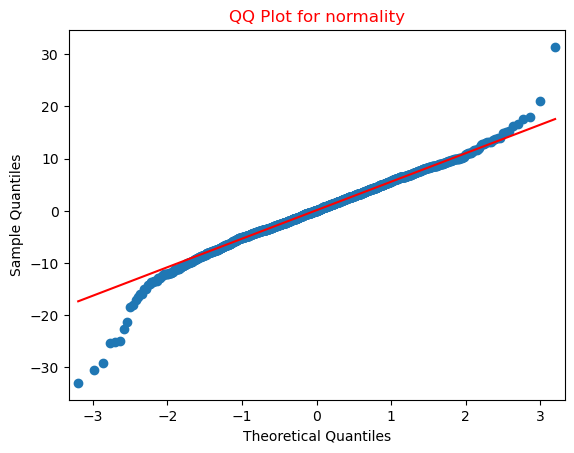

In [61]:
sm.qqplot(final_sqrt_model.resid, line='q')
plt.title('QQ Plot for normality', fontdict={'color':'red'})
plt.show()

In [62]:
def get_standard_values(vals):
    return (vals-vals.mean())/(vals.std())

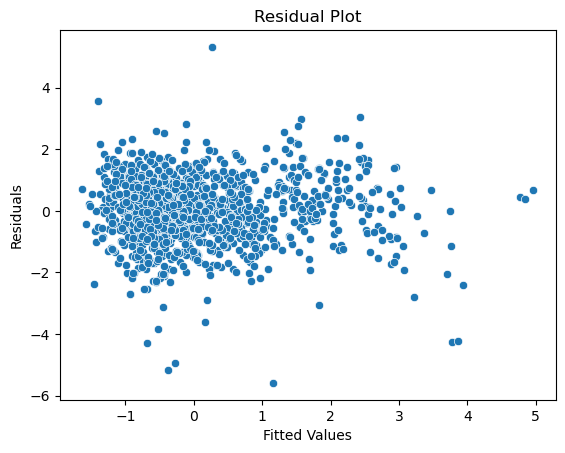

In [63]:
sns.scatterplot(x= get_standard_values(final_sqrt_model.fittedvalues), y= get_standard_values(final_sqrt_model.resid))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

eval_env: 1


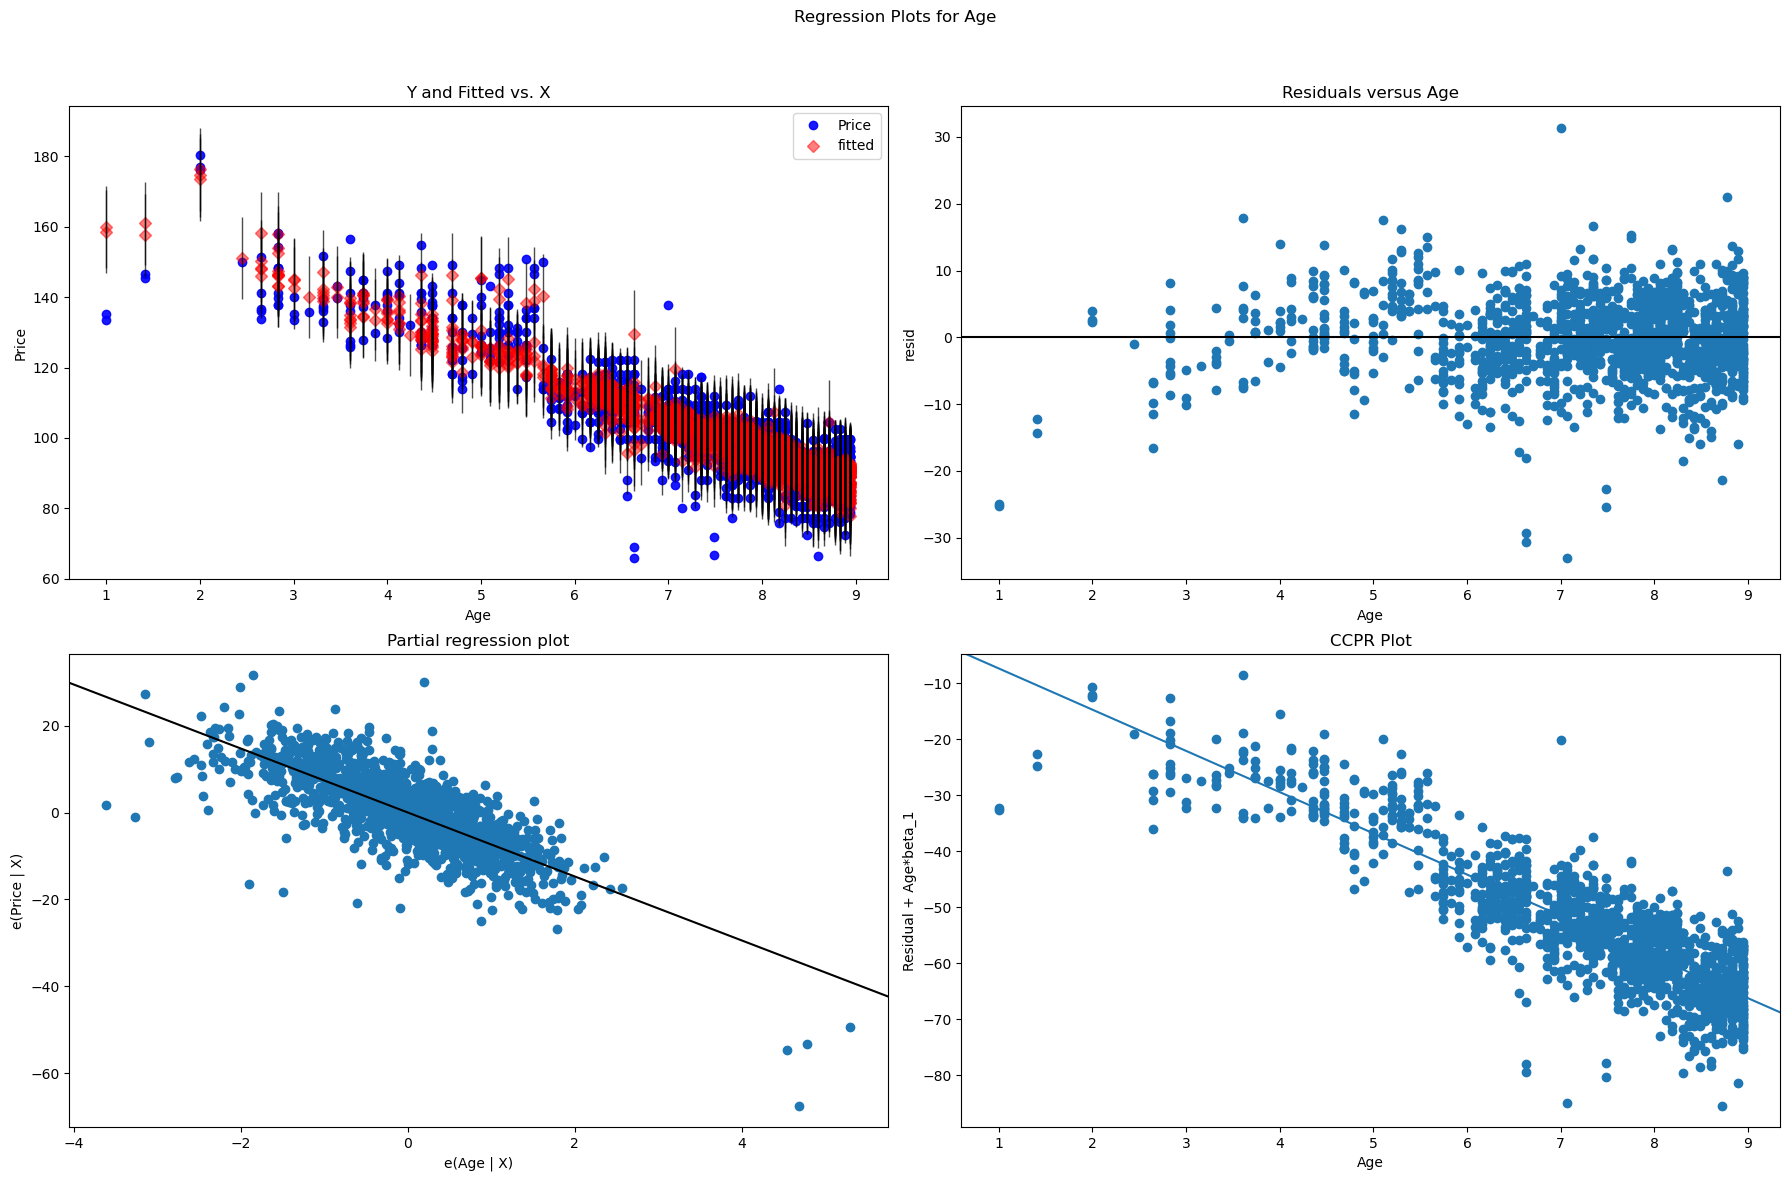

In [64]:
sm.graphics.plot_regress_exog(final_sqrt_model,'Age', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


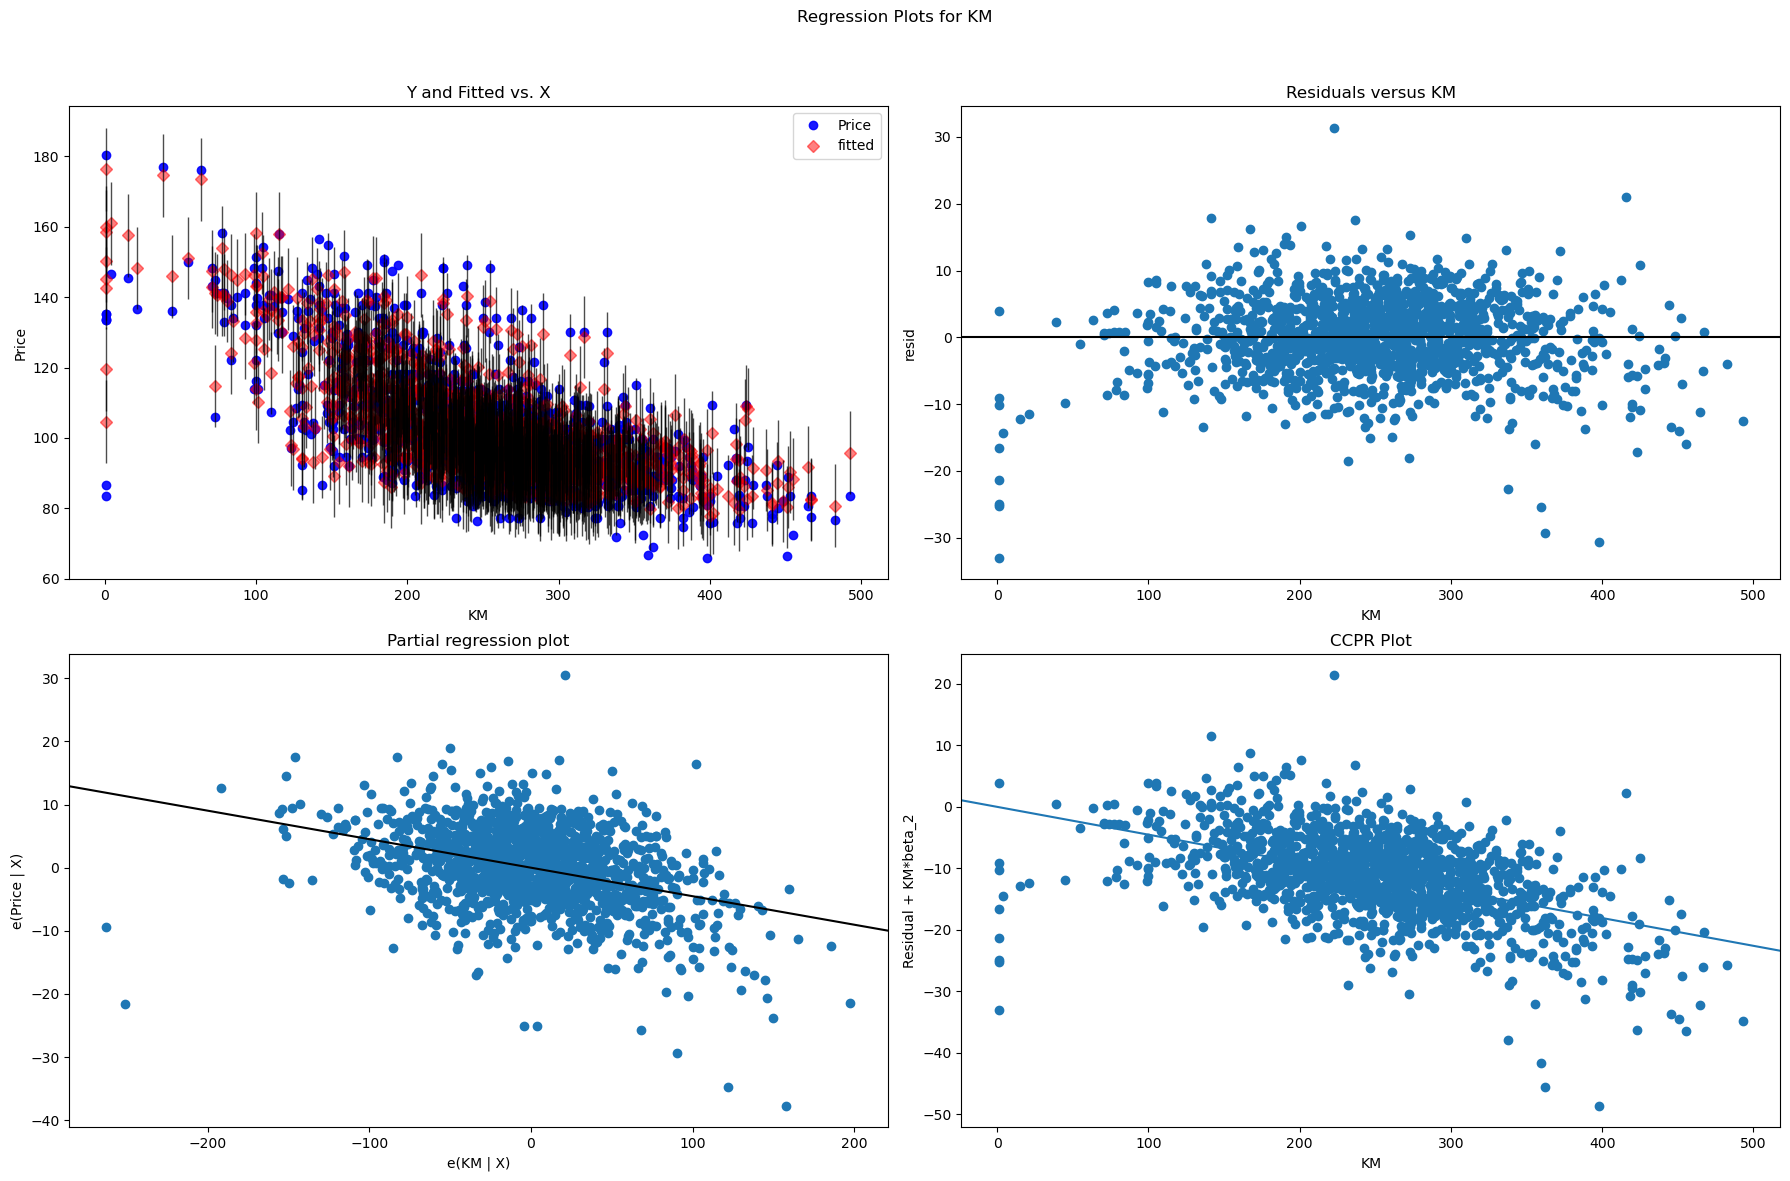

In [65]:
sm.graphics.plot_regress_exog(final_sqrt_model,'KM', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


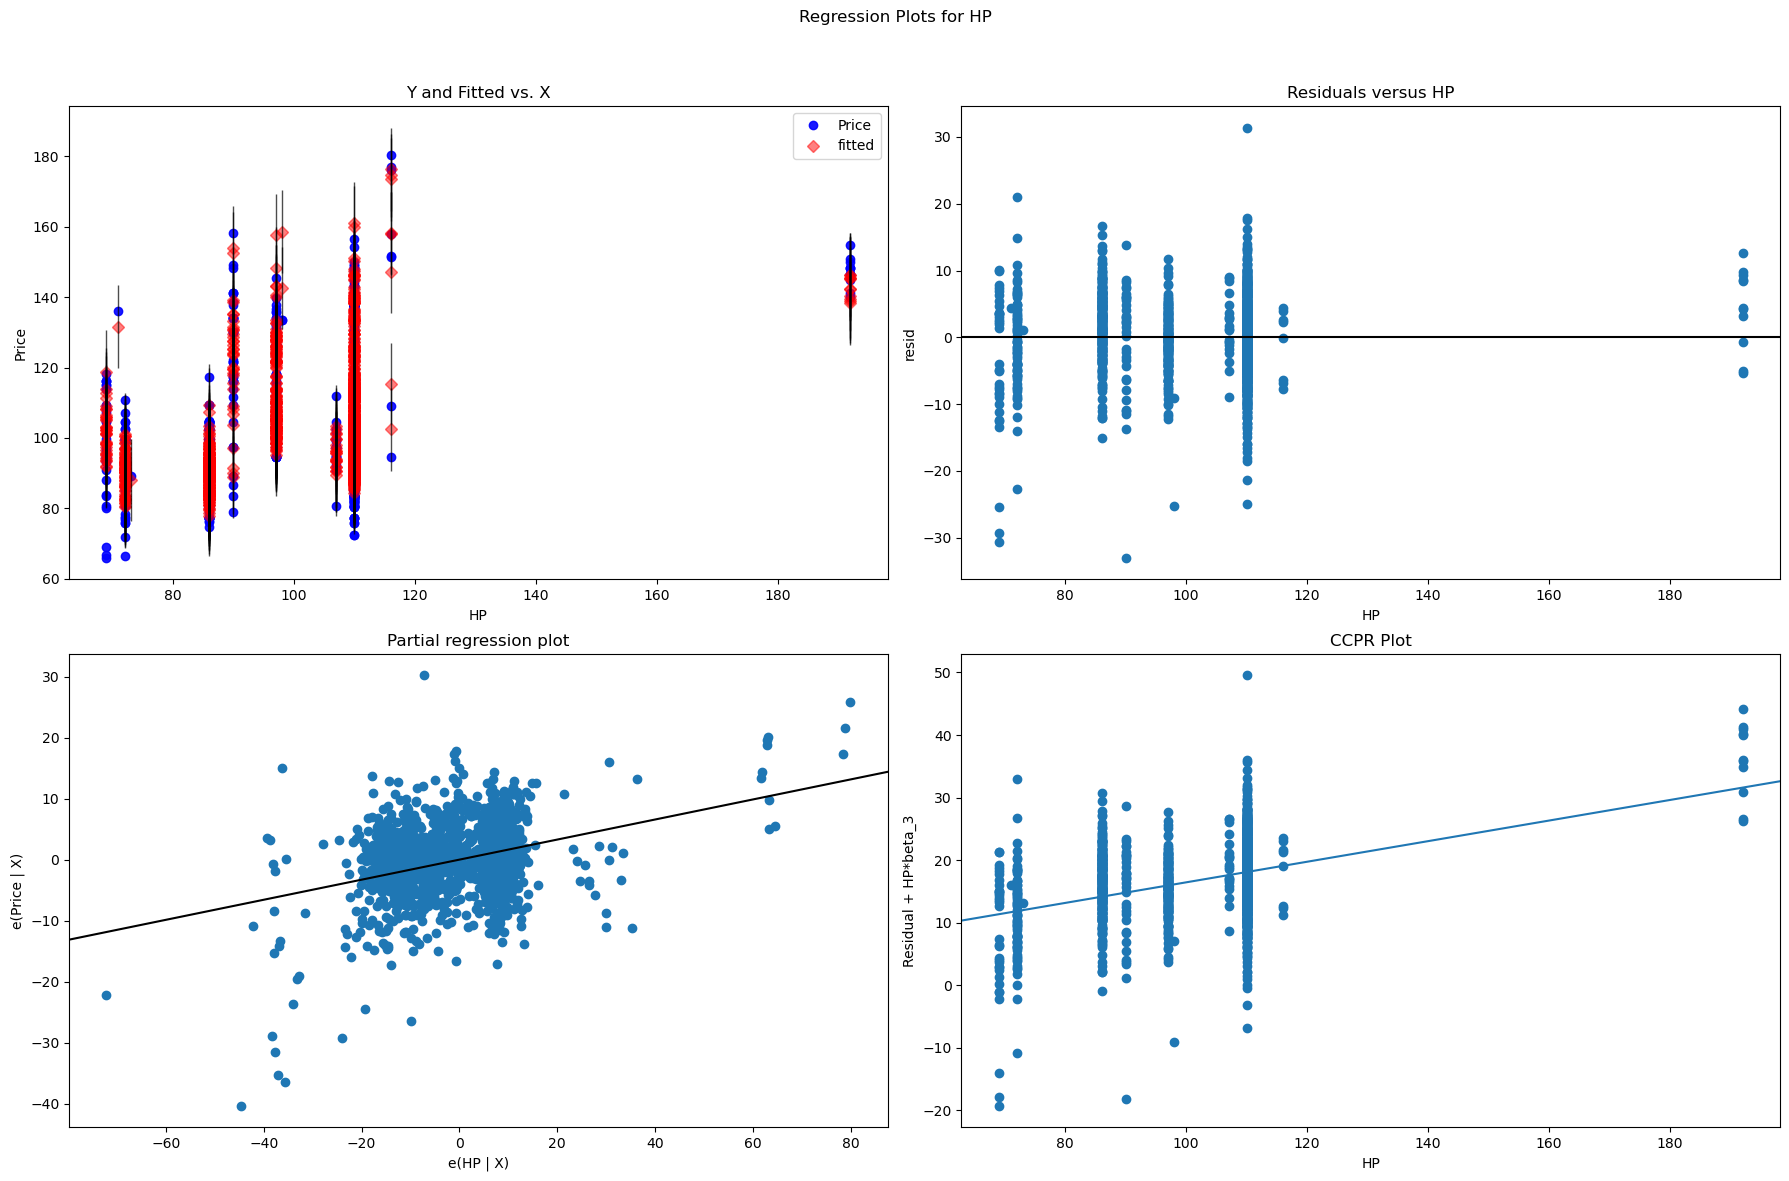

In [66]:
sm.graphics.plot_regress_exog(final_sqrt_model,'HP', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


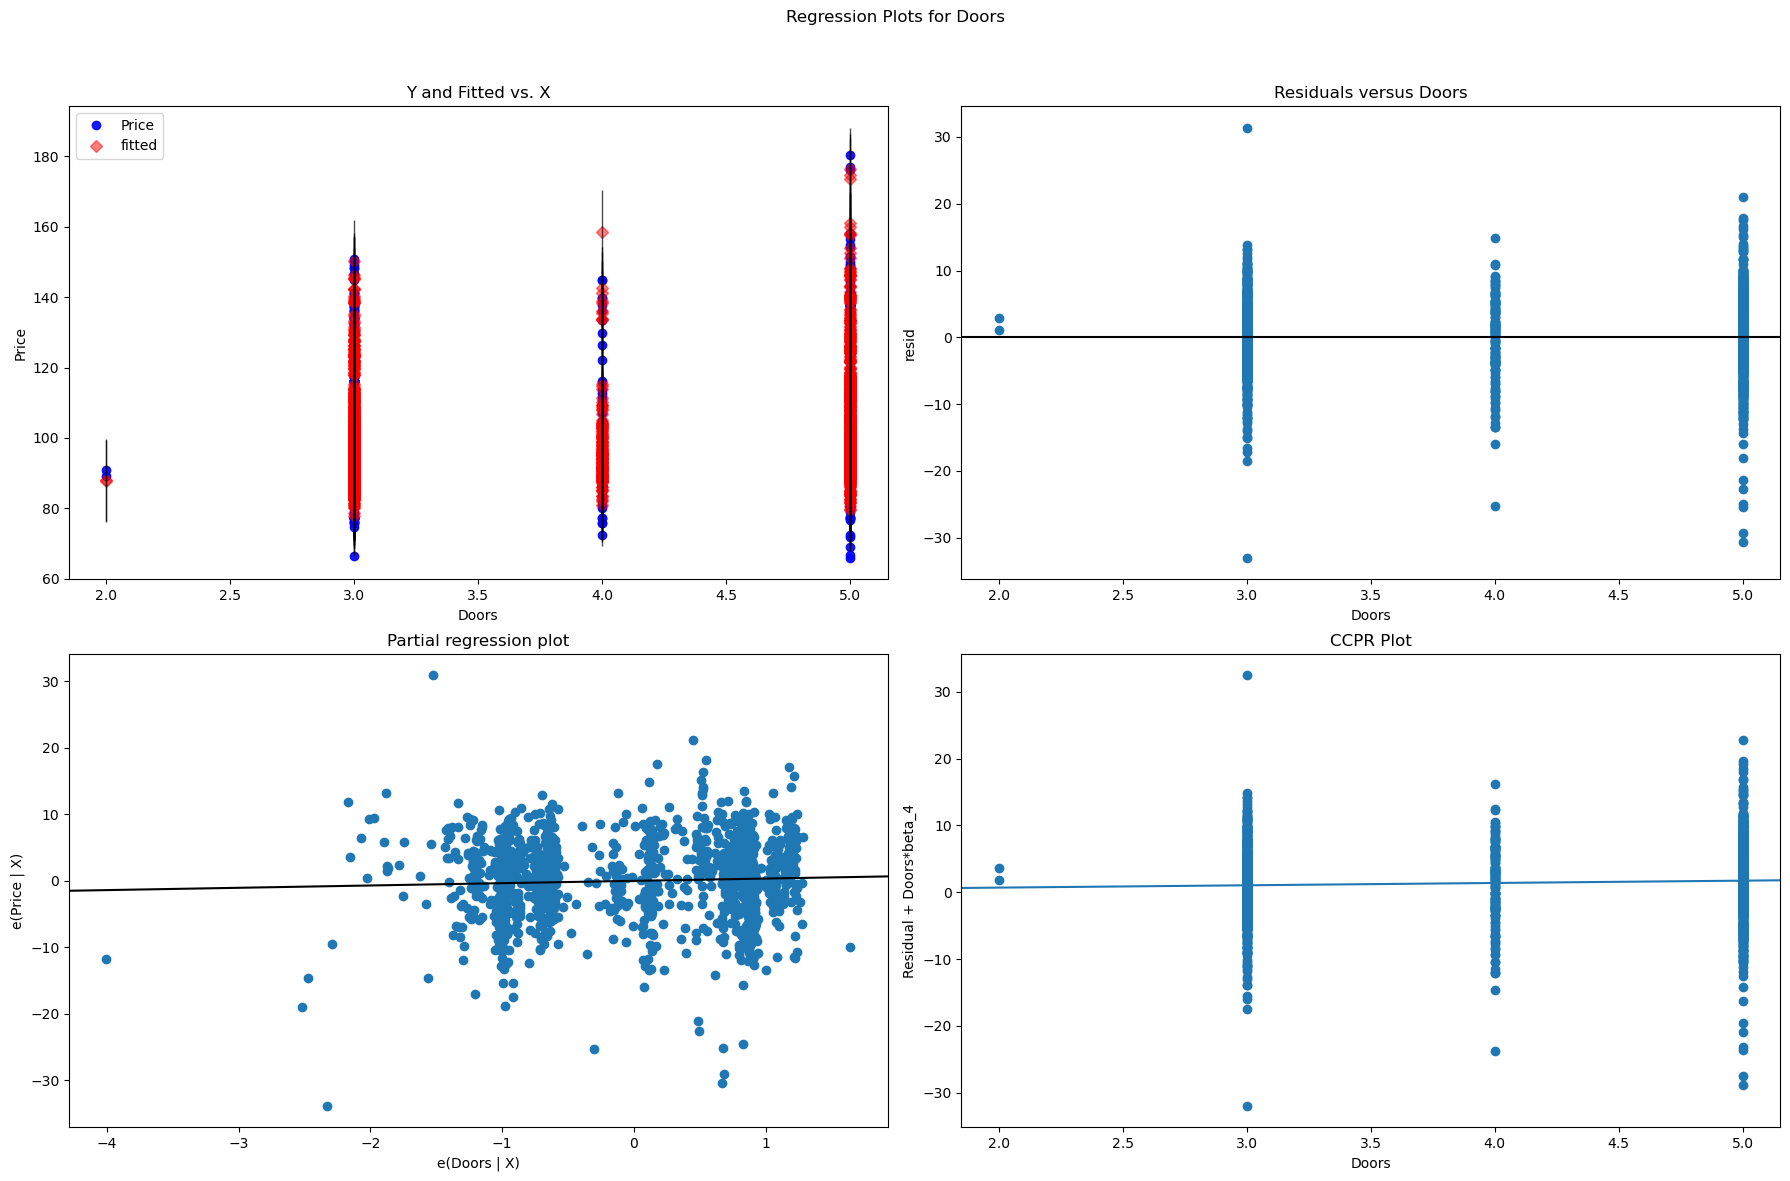

In [67]:
sm.graphics.plot_regress_exog(final_sqrt_model,'Doors', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


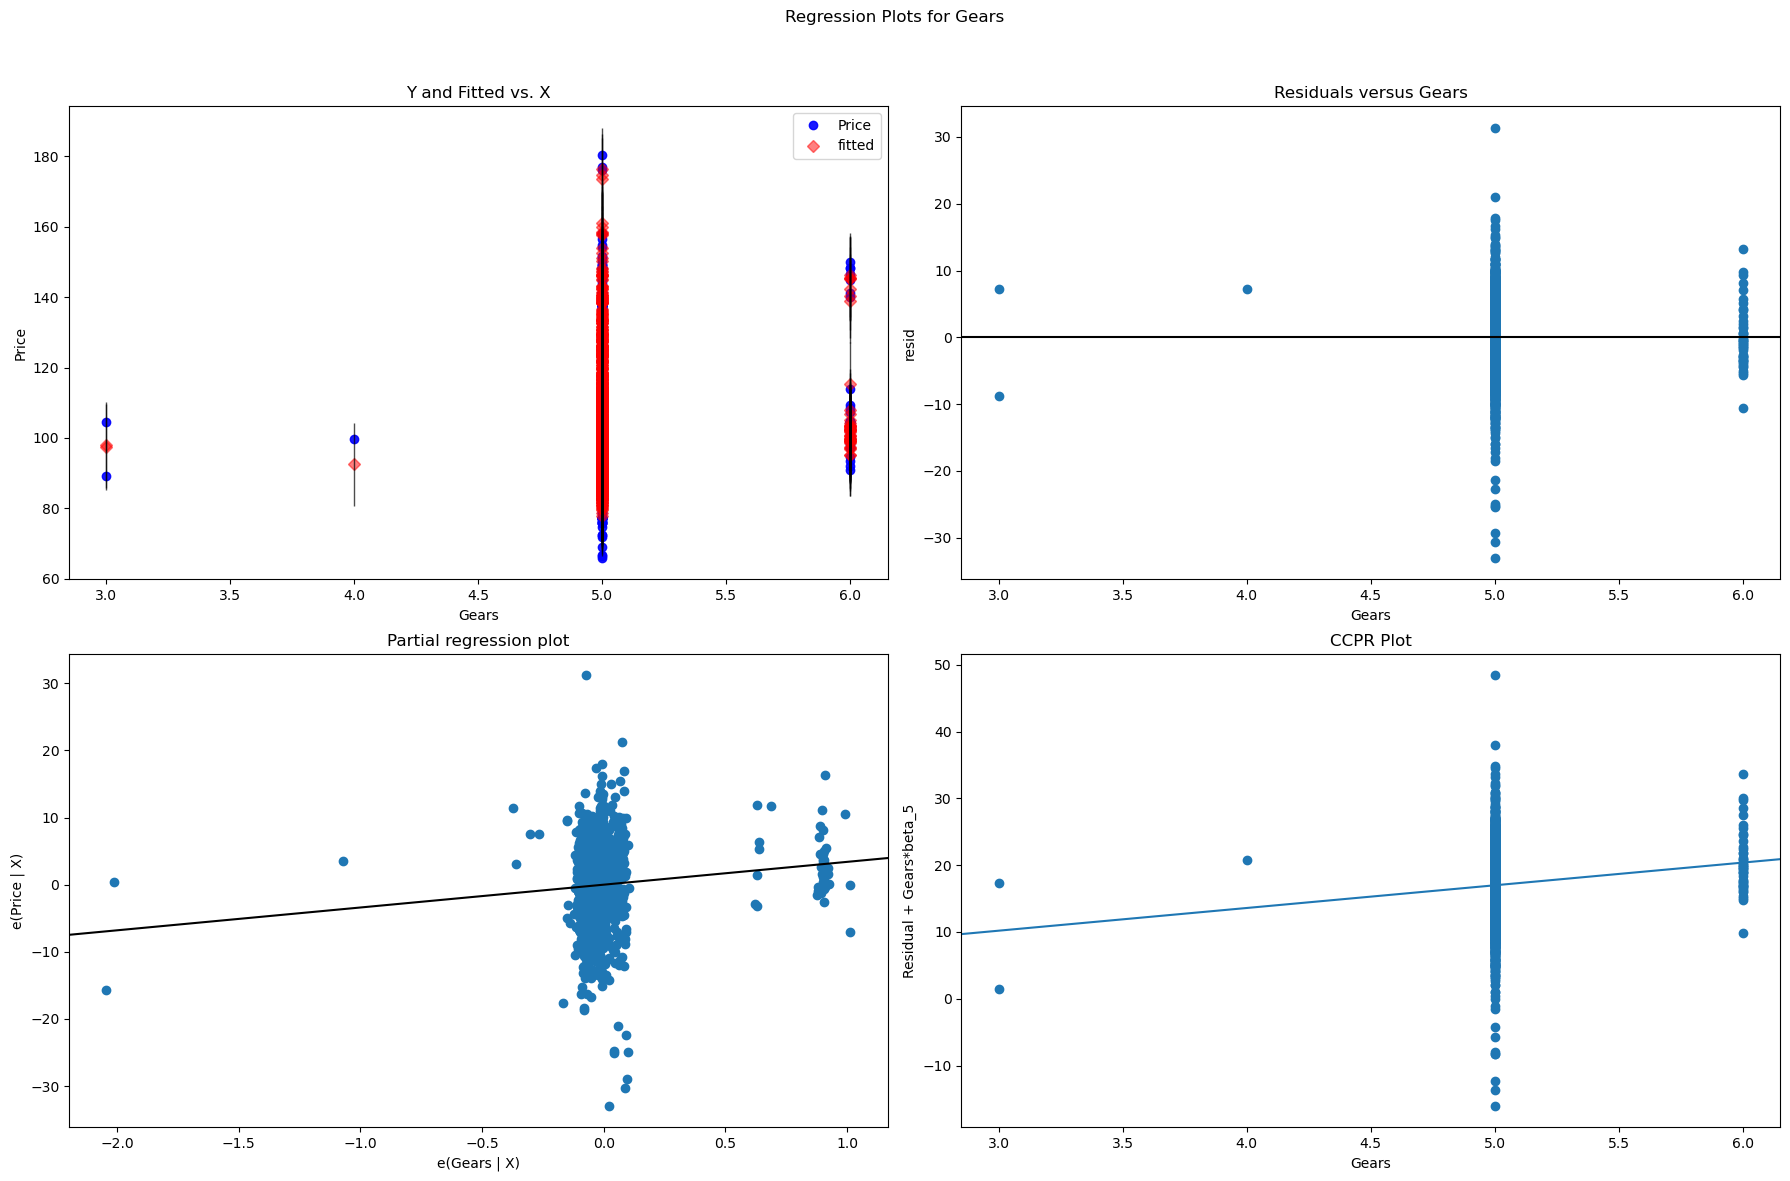

In [68]:
sm.graphics.plot_regress_exog(final_sqrt_model,'Gears', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


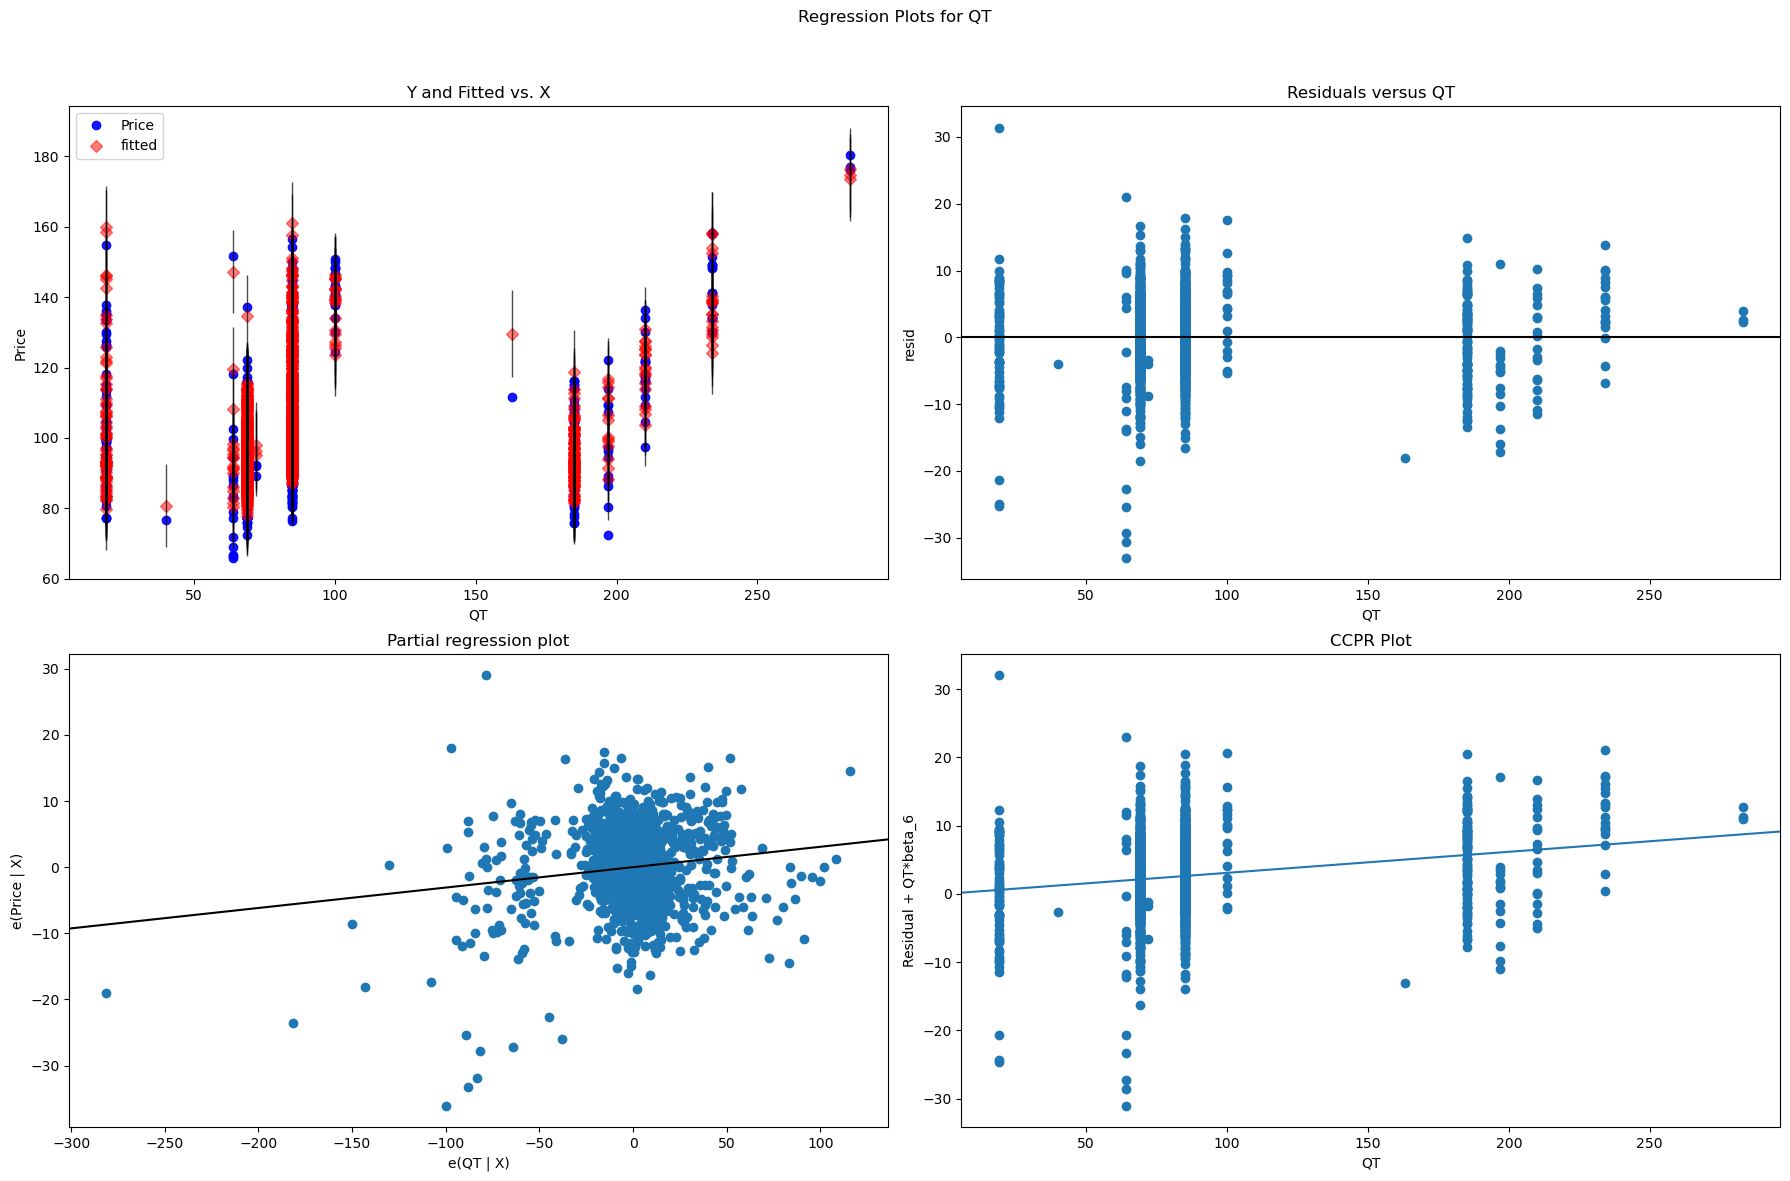

In [69]:
sm.graphics.plot_regress_exog(final_sqrt_model,'QT', fig =plt.figure(figsize=[18,12]))
plt.show()

eval_env: 1


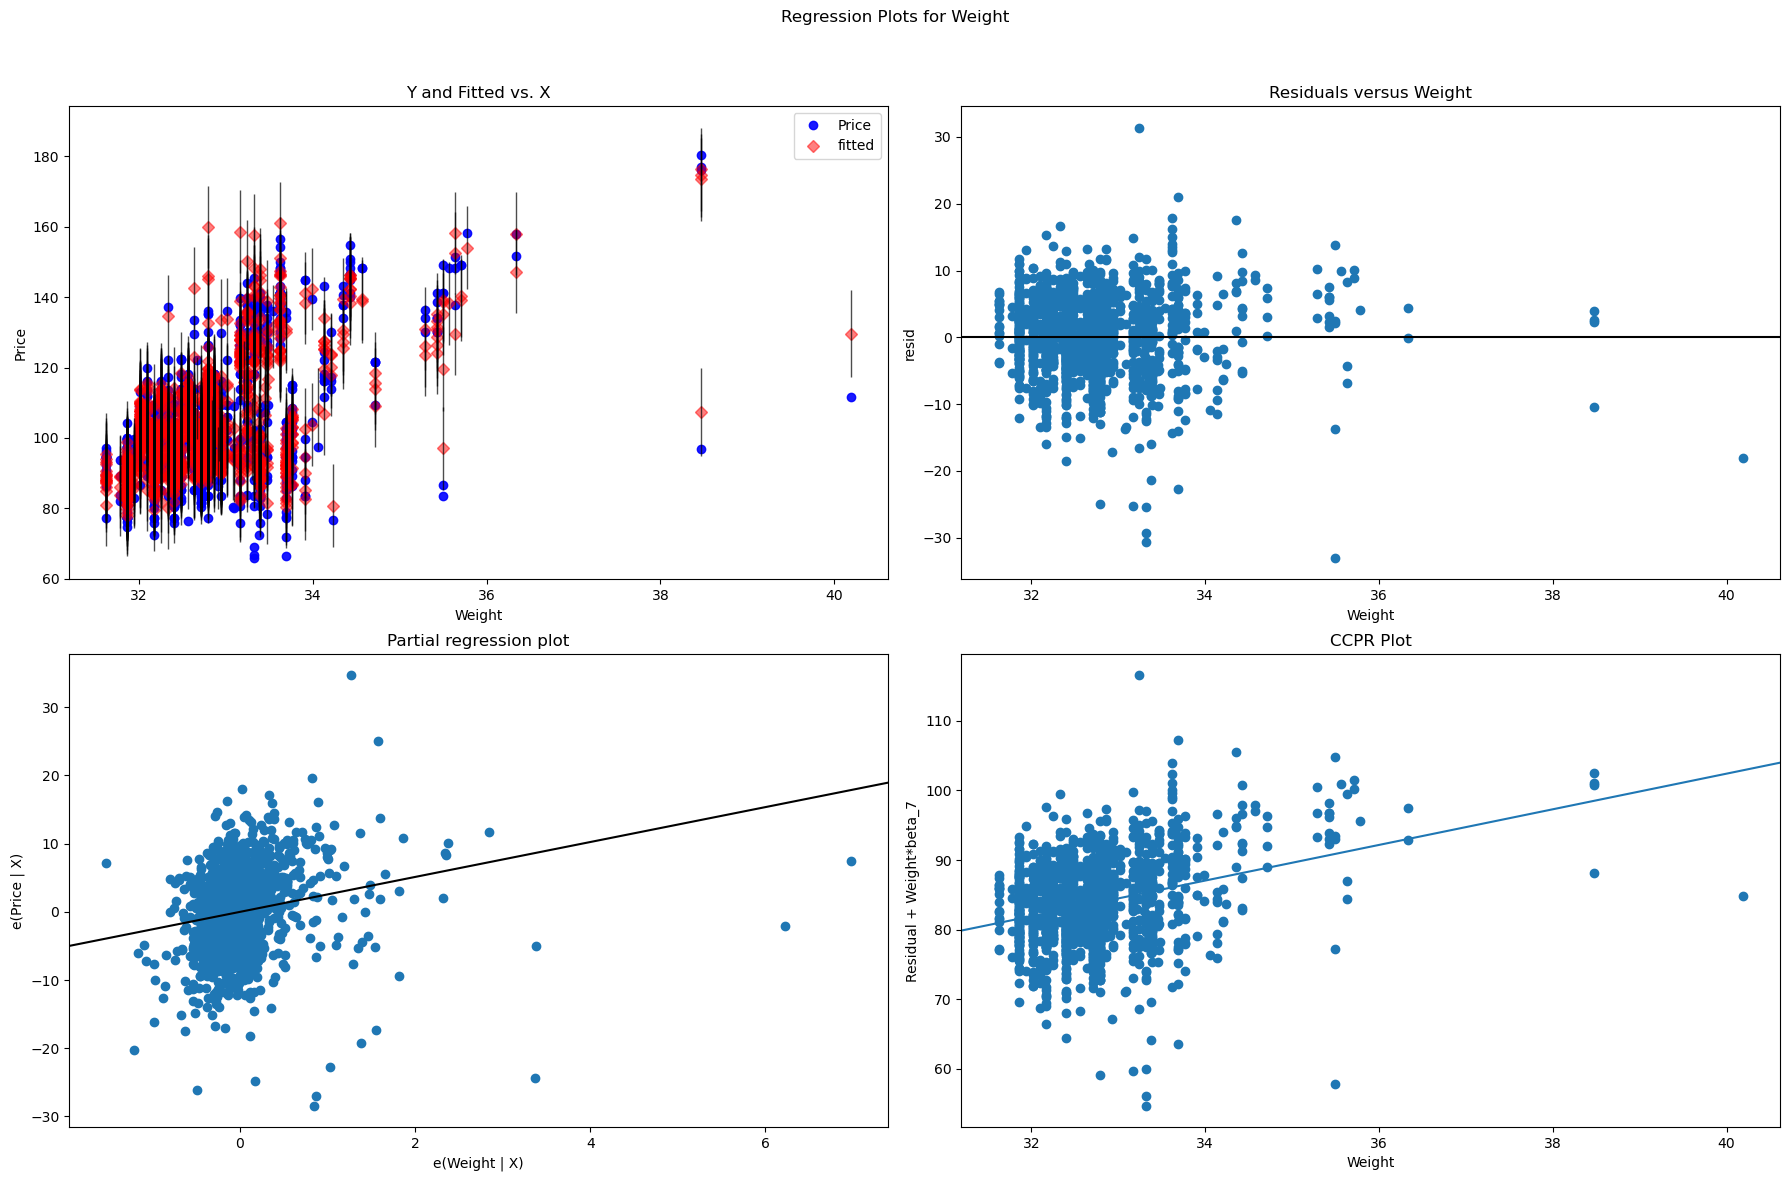

In [70]:
sm.graphics.plot_regress_exog(final_sqrt_model,'Weight', fig =plt.figure(figsize=[18,12]))
plt.show()

In [71]:
k=df_sqrt.shape[1]
n=df_sqrt.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


In [72]:
(c,_)= final_sqrt_model.get_influence().cooks_distance

<StemContainer object of 3 artists>

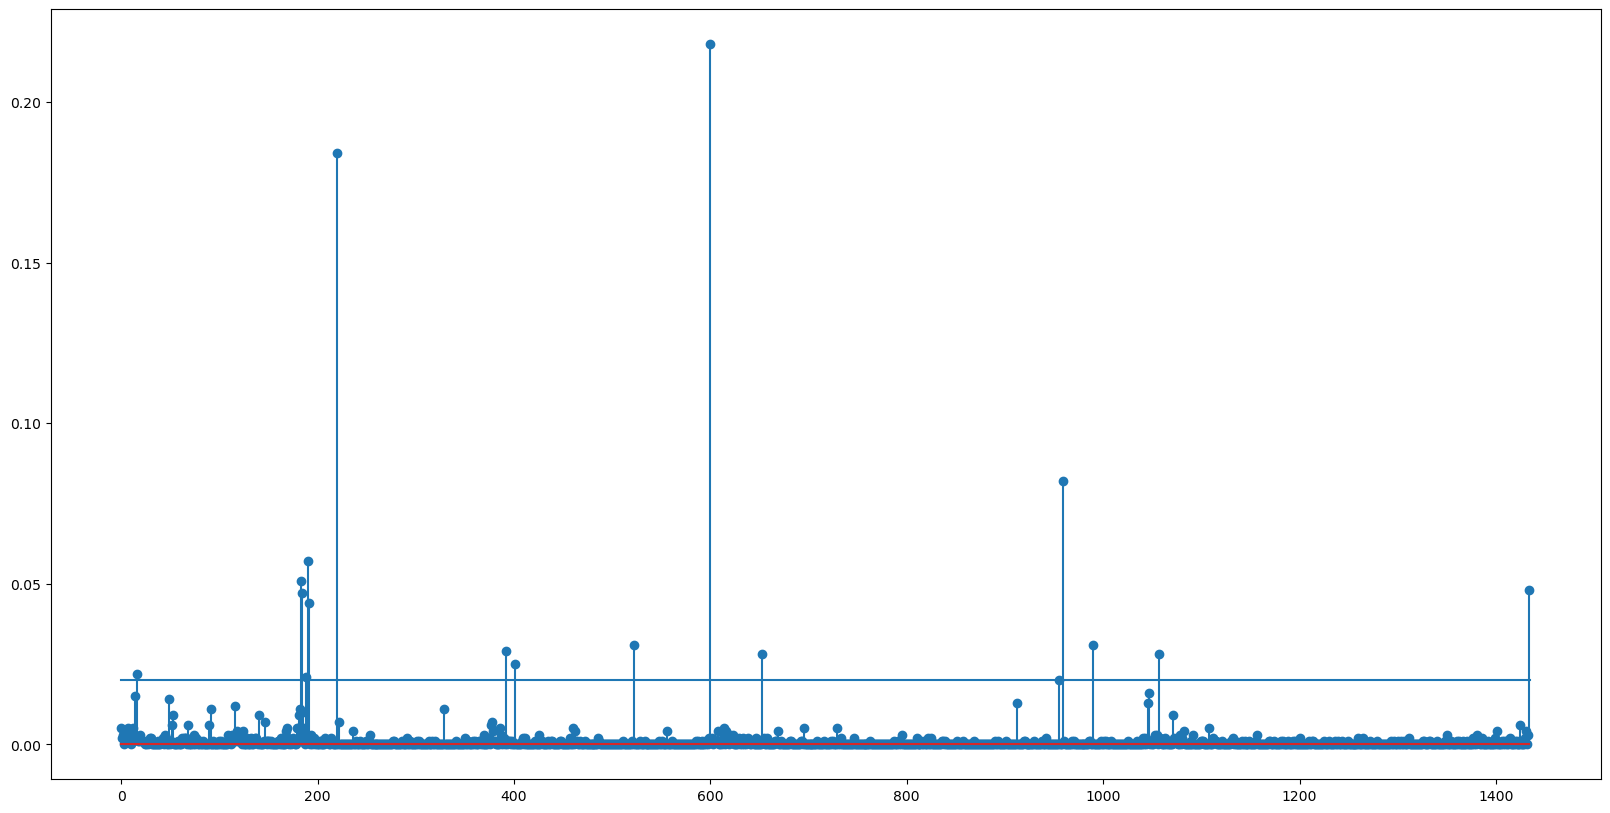

In [73]:
plt.figure(figsize=[20,10])
x=[0,len(df_sqrt)]
y=[0.02,0.02]
plt.plot(x,y)
plt.stem(np.arange(len(df_sqrt)), np.round(c, 3))

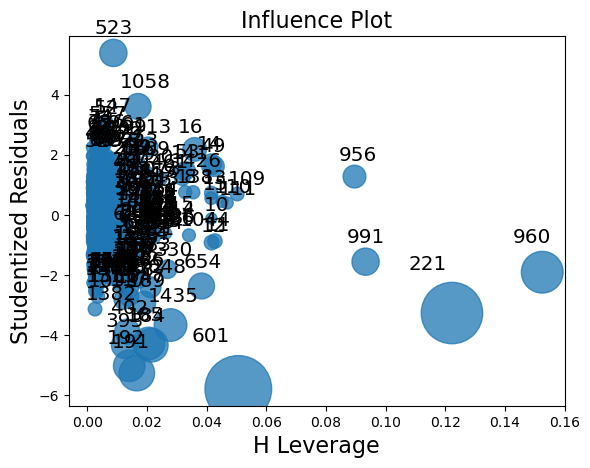

In [74]:
influence_plot(final_sqrt_model)
plt.show()

In [75]:
while np.max(c)>leverage_cutoff:
    final_sqrt_model = smf.ols('Price~Age+KM+HP+Doors+Gears+QT+Weight',data=df_sqrt).fit()
    (c,_) = final_sqrt_model.get_influence().cooks_distance
    np.max(c)
    df_sqrt = df_sqrt.drop(df_sqrt.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df_sqrt
else:
    final_model = smf.ols('Price~Age+KM+HP+Doors+Gears+QT+Weight',data=df_sqrt).fit()
    (c,_) = final_model.get_influence().cooks_distance
    print(final_model.rsquared , final_model.aic)
    display(final_model.summary())
    

0.8873407033123566 8705.067516792826


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1578.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:45:33   Log-Likelihood:                -4344.5
No. Observations:                1410   AIC:                             8705.
Df Residuals:                    1402   BIC:                             8747.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.5977     12.621     -2.187      0.029     -52.356      -2.839
Age           -7.0923      0.155    -45.698      0.000      -7.397      -6.788
KM            -0.0460      0.003    -16.545      0.000      -0.051      -0.041
HP             0.0894      0.012      7.191      0.000       0.065       0.114
Doors          0.1737      0.164      1.060      0.289      -0.148       0.495
Gears          3.4146      0.892      3.829      0.000       1.665       5.164
QT            -0.0099      0.006     -1.613      0.107      -0.022       0.002
Weight         5.1202      0.383     13.383      0.000       4.370       5.871
==============================================================================
Omnibus:                        4.906   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.819
Skew:                          -0.125   Prob(JB):                       0.0898
Kurtosis:                       3.141   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
df_sqrt.shape

(1410, 9)

<StemContainer object of 3 artists>

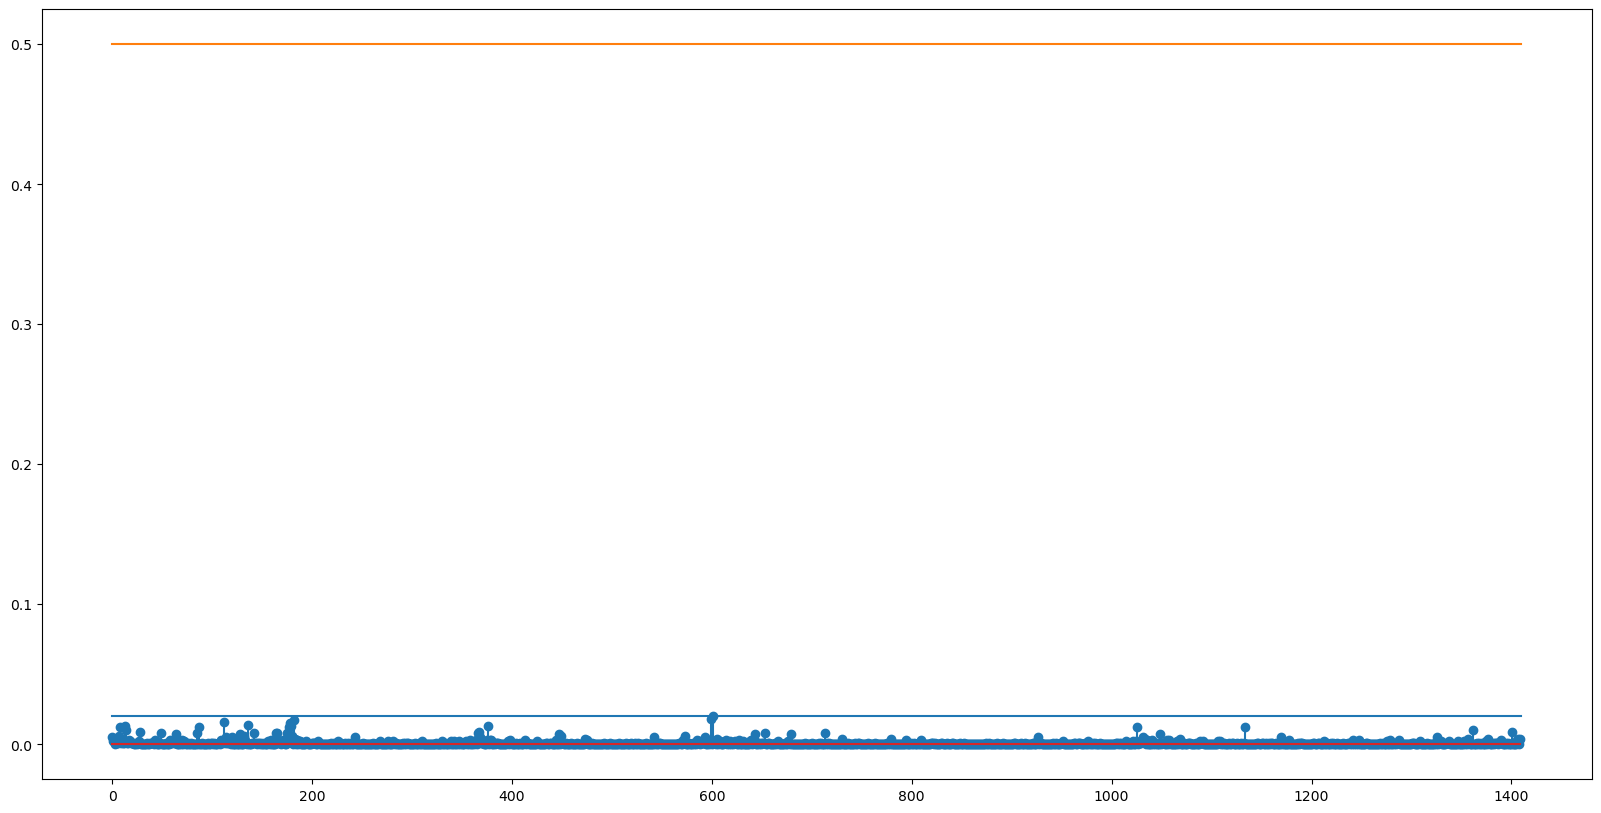

In [77]:
plt.figure(figsize=[20,10])
x=[0,1410]
y=[0.02,0.02]
y1=[0.5,0.5]
plt.plot(x,y)
plt.plot(x,y1)
plt.stem(np.arange(len(df_sqrt)), np.round(c, 3))

In [78]:
df_sqrt = raw_data.copy()
df_sqrt[continuous_feature]= np.sqrt(df_sqrt[continuous_feature])
df_sqrt

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,4.795832,216.762543,90.0,2000,3,5,210,34.132096,116.189500
1,4.795832,270.068510,90.0,2000,3,5,210,34.132096,117.260394
2,4.898979,204.232710,90.0,2000,3,5,210,34.132096,118.110118
3,5.099020,219.089023,90.0,2000,3,5,210,34.132096,122.270193
4,5.477226,196.214169,90.0,2000,3,5,210,34.205263,117.260394
...,...,...,...,...,...,...,...,...,...
1431,8.306624,143.331783,86.0,1300,3,5,69,32.015621,86.602540
1432,8.485281,137.840488,86.0,1300,3,5,69,31.859065,104.139330
1433,8.426150,130.445391,86.0,1300,3,5,69,31.859065,92.195445
1434,8.366600,130.061524,86.0,1300,3,5,69,31.859065,85.146932


In [79]:
predicted = data.copy()


predicted['Predicted Price'] = np.square(final_model.predict(df_sqrt))
predicted

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Predicted Price
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,0,0,0,1,0,0,0,16064.319498
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,0,1,0,0,0,1,0,0,0,15449.331905
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,1,0,0,0,1,0,0,0,16024.868305
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,1,0,0,0,1,0,0,0,15497.233226
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,0,1,0,1,0,0,0,15185.981866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86.0,1,...,1,1,0,1,1,1,0,0,0,9106.531808
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86.0,0,...,0,1,0,0,1,1,0,0,0,8763.171681
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86.0,0,...,0,1,0,0,0,1,0,0,0,8905.894073
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86.0,1,...,0,0,0,0,0,1,0,0,0,8989.131026


In [81]:
predicted.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar', 'Predicted Price'],
      dtype='object')

In [82]:
predicted = predicted[['Id', 'Model', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar','Price', 'Predicted Price']]

In [83]:
predicted

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Price,Predicted Price
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,10,2002,46986,Diesel,90.0,1,Blue,...,1,0,0,0,1,0,0,0,13500,16064.319498
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,10,2002,72937,Diesel,90.0,1,Silver,...,1,0,0,0,1,0,0,0,13750,15449.331905
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,9,2002,41711,Diesel,90.0,1,Blue,...,1,0,0,0,1,0,0,0,13950,16024.868305
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,7,2002,48000,Diesel,90.0,0,Black,...,1,0,0,0,1,0,0,0,14950,15497.233226
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,30,3,2002,38500,Diesel,90.0,0,Black,...,1,0,1,0,1,0,0,0,13750,15185.981866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,69,12,1998,20544,Petrol,86.0,1,Blue,...,1,0,1,1,1,0,0,0,7500,9106.531808
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,72,9,1998,19000,Petrol,86.0,0,Grey,...,1,0,0,1,1,0,0,0,10845,8763.171681
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,71,10,1998,17016,Petrol,86.0,0,Blue,...,1,0,0,0,1,0,0,0,8500,8905.894073
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,70,11,1998,16916,Petrol,86.0,1,Grey,...,0,0,0,0,1,0,0,0,7250,8989.131026


###### <font color='green'> Observation